In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.tools.plotting import parallel_coordinates

import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

from scipy import stats
import math

In [2]:
xls = pd.ExcelFile('2014年基本信息表.xls')
data_upperHalf = xls.parse('基本信息表2014上半年')
data_lowerHalf = xls.parse('基本信息表2014下半年')
data = pd.DataFrame()
data = pd.concat([data_upperHalf,data_lowerHalf],ignore_index=True)

xls = pd.ExcelFile('2015年基本信息表.xls')
data_upperHalf = xls.parse('基本信息表2015年上半年')
data_lowerHalf = xls.parse('基本信息表2015年上半年')
data = pd.concat([data,data_upperHalf,data_lowerHalf],ignore_index=True)

xls = pd.ExcelFile('2016年基本信息表.xls')
data_upperHalf = xls.parse('2016年上半年基本信息表')
data_lowerHalf = xls.parse('2016年下半年基本信息表')
data = pd.concat([data,data_upperHalf,data_lowerHalf],ignore_index=True)
xls.close()

del data_upperHalf
del data_lowerHalf

In [3]:
data_accidentInfo = data[['事故初查原因','事故初查原因分类','事故认定原因','事故认定原因分类小类',\
                         '事故形态','事故类型','单车事故','是否简易程序','是否运载危险物品','是否逃逸',\
                         '涉外事故','路外事故类型','车辆间事故','车辆间事故.1','运载危险品事故后果','逃逸事故侦破']]
data_accidentInfo.head()

事故初查原因  事故初查原因分类  事故认定原因  事故认定原因分类小类 事故形态 事故类型 单车事故 是否简易程序 是否运载危险物品  是否逃逸  \
0  9901.0      99.0  9901.0         NaN   12    1  NaN      2        2   NaN   
1  1225.0      49.0  1225.0         1.0   30    1   39      2        2   NaN   
2  1094.0      49.0  1225.0         1.0   12    1  NaN      2        2   NaN   
3  1225.0      49.0  1225.0         1.0   11    1  NaN      2        2   NaN   
4  2009.0      60.0  2009.0         2.0   11    1  NaN      2        2   NaN   

  涉外事故 路外事故类型  车辆间事故  车辆间事故.1  运载危险品事故后果 逃逸事故侦破  
0    2    NaN    NaN      1.0        NaN    NaN  
1    2    NaN    NaN      2.0        NaN    NaN  
2    2    NaN    NaN      3.0        NaN    NaN  
3    2    NaN    NaN      NaN        NaN    NaN  
4    2    NaN    NaN      6.0        NaN    NaN

In [4]:
#事故初查原因,事故认定原因
test = data_accidentInfo
print('事故初查原因缺失率：%s'%(sum(test['事故初查原因'].isnull())/len(test)))
print('事故认定原因：%s'%(sum(test['事故认定原因'].isnull())/len(test)))
# print(sum(test['事故初查原因'] == test['事故认定原因']))

事故初查原因缺失率：0.905812164357
事故认定原因：0.0103162595737


In [5]:
test_NoNan = test.dropna(how='any',axis=0,subset=['事故初查原因','事故认定原因'])
print('事故初查原因与事故认定原因不一率：%s'%(sum(pd.DataFrame(test_NoNan['事故初查原因']==test_NoNan['事故认定原因'])[0]==False)\
                                             /len(test_NoNan)))

事故初查原因与事故认定原因不一率：0.0444586744729


## 1.1 事故类型分析

In [18]:
#用此无缺失数据做判断
test_reason = test_NoNan[['事故形态','事故类型','单车事故','是否简易程序','是否运载危险物品','是否逃逸',\
                         '涉外事故','路外事故类型','车辆间事故','车辆间事故.1','运载危险品事故后果','逃逸事故侦破']]
test_reason.head(10)

事故形态 事故类型 单车事故 是否简易程序 是否运载危险物品  是否逃逸 涉外事故 路外事故类型  车辆间事故  车辆间事故.1  运载危险品事故后果  \
0   12    1  NaN      2        2   NaN    2    NaN    NaN      1.0        NaN   
1   30    1   39      2        2   NaN    2    NaN    NaN      2.0        NaN   
2   12    1  NaN      2        2   NaN    2    NaN    NaN      3.0        NaN   
3   11    1  NaN      2        2   NaN    2    NaN    NaN      NaN        NaN   
4   11    1  NaN      2        2   NaN    2    NaN    NaN      6.0        NaN   
5   70    1   29      2        2   NaN    2    NaN    NaN      NaN        NaN   
6   70    1   39      2        2   NaN    2    NaN    NaN      NaN        NaN   
7   21    1  NaN      2        2   NaN    2    NaN    NaN      2.0        NaN   
8   11    1  NaN      2        2   NaN    2    NaN    NaN      6.0        NaN   
9   11    1  NaN      2        2   NaN    2    NaN    NaN      3.0        NaN   

  逃逸事故侦破  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
5    NaN  
6    NaN  
7    NaN  
8    NaN  
9    NaN

In [19]:
for i in test_reason.columns:
    print('%s：%s'%(i,sum(test_reason[i].isnull())/len(test_reason)))

事故形态：0.00155513881901
事故类型：0.0
单车事故：0.824360792206
是否简易程序：0.0
是否运载危险物品：0.0
是否逃逸：1.0
涉外事故：0.0
路外事故类型：0.997941728034
车辆间事故：1.0
车辆间事故.1：0.139322142432
运载危险品事故后果：1.0
逃逸事故侦破：0.957462379362


In [24]:
#删除空白列：是否逃逸  涉外事故  车辆间事故  运载危险品事故后果
test_reason.drop(['是否逃逸','涉外事故','车辆间事故','运载危险品事故后果'],inplace=True,axis=1)
for i in test_reason.columns:
    print('%s：%s'%(i,sum(test_reason[i].isnull())/len(test_reason)))

事故形态：0.00155513881901
事故类型：0.0
单车事故：0.824360792206
是否简易程序：0.0
是否运载危险物品：0.0
路外事故类型：0.997941728034
车辆间事故.1：0.139322142432
逃逸事故侦破：0.957462379362


D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


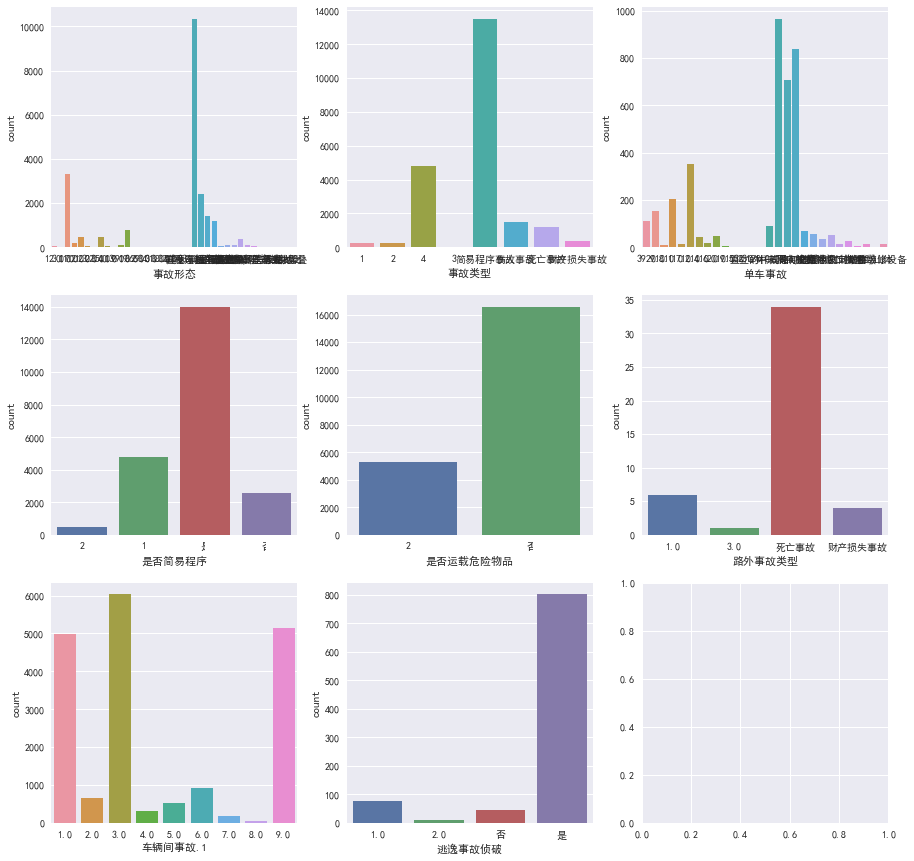

In [27]:
fig,axises = plt.subplots(3,3,figsize=(15,15))
x=0
y=0
for i in test_reason.columns:
    sns.countplot(test_reason[i],ax=axises[x,y])
    y = y+1
    if y==3:
        x += 1
        y=0

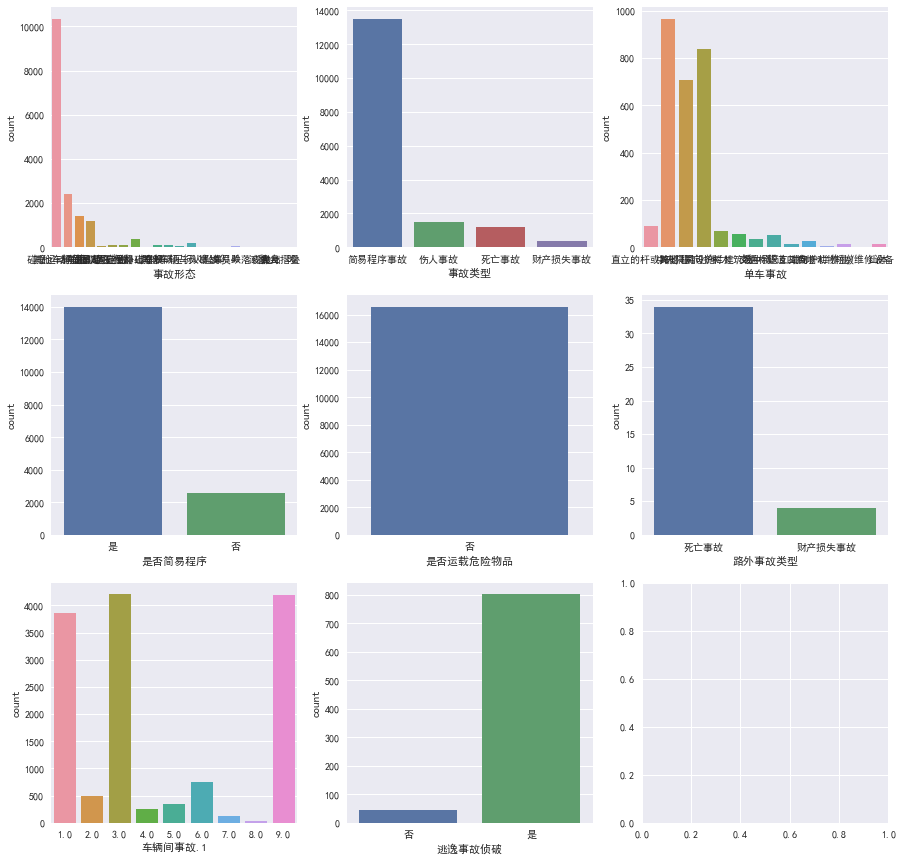

In [28]:
test_reason = test_reason[test_reason.事故类型.isin(['简易程序事故','伤人事故','死亡事故','财产损失事故'])]
fig,axises = plt.subplots(3,3,figsize=(15,15))
x=0
y=0
for i in test_reason.columns:
    sns.countplot(test_reason[i],ax=axises[x,y])
    y = y+1
    if y==3:
        x += 1
        y=0

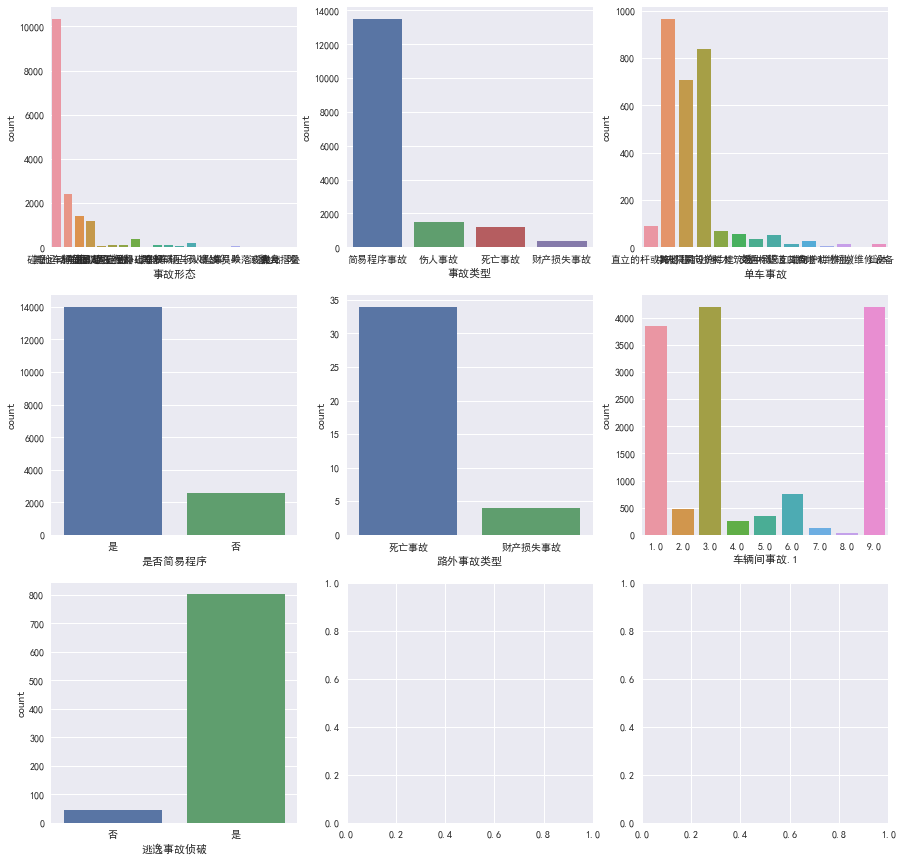

In [31]:
test_reason.drop(['是否运载危险物品'],axis=1,inplace=True)
fig,axises = plt.subplots(3,3,figsize=(15,15))
x=0
y=0
for i in test_reason.columns:
    sns.countplot(test_reason[i],ax=axises[x,y])
    y = y+1
    if y==3:
        x += 1
        y=0

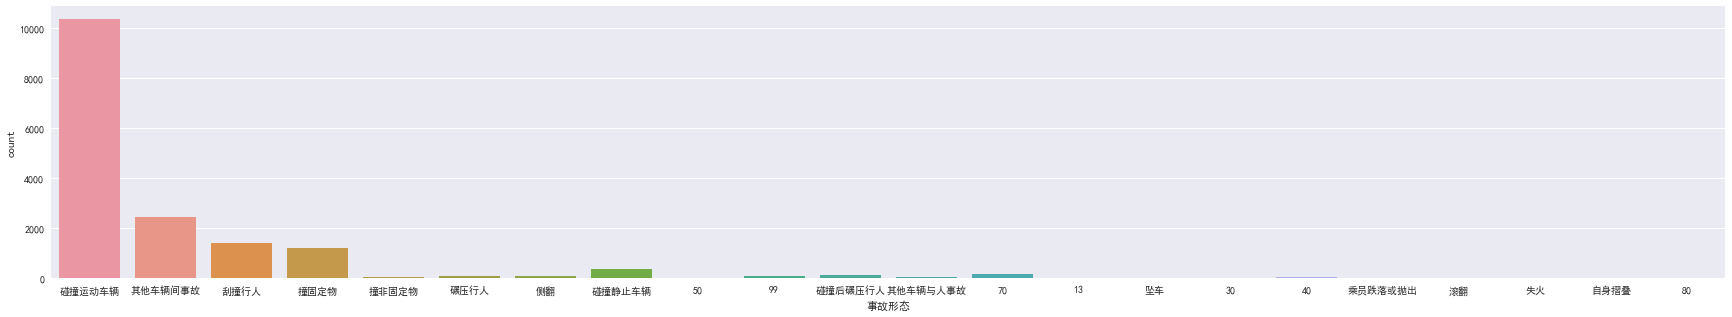

In [40]:
fig,axes = plt.subplots(1,1,figsize=(30,5))
sns.countplot(test_reason['事故形态'],ax=axes)

In [41]:
test_reason = test_reason[test_reason.事故形态.isin(['碰撞运动车辆','其他车辆事故',\
                                                '刮撞行人','撞固定物',\
                                                '撞非固定物','碾压行人',\
                                                '侧翻','碰撞静止车辆',\
                                                '碰撞后碾压行人','其他车辆与人事故',\
                                                '坠车','乘员跌落或抛出',\
                                                '翻滚','失火','自身摺叠'])]

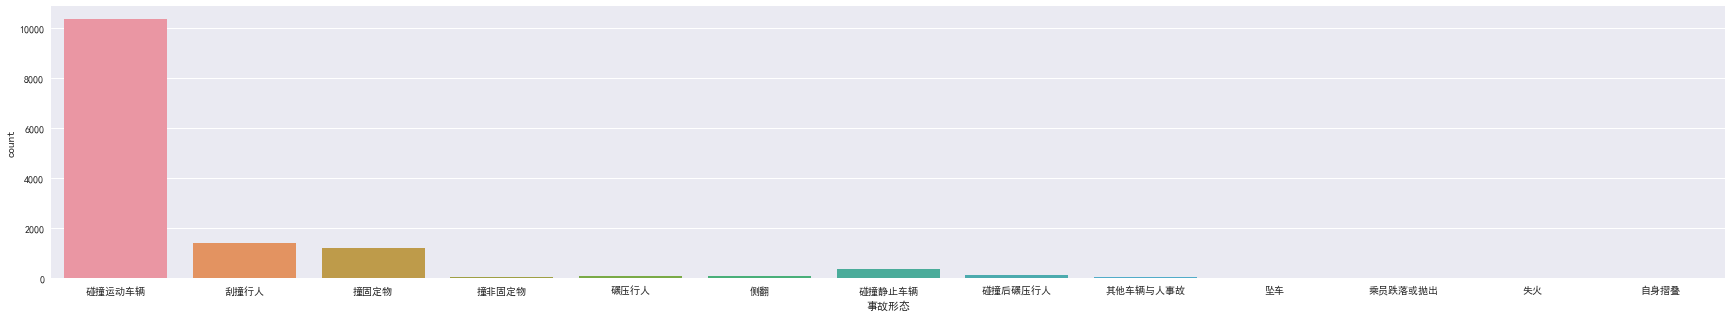

In [42]:
fig,axes = plt.subplots(1,1,figsize=(30,5))
sns.countplot(test_reason['事故形态'],ax=axes)

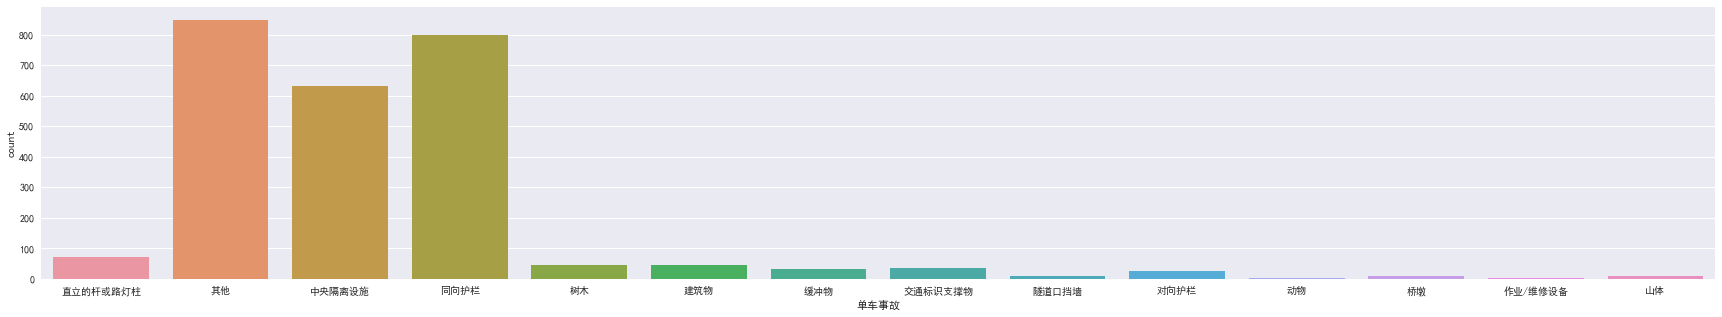

In [43]:
fig,axes = plt.subplots(1,1,figsize=(30,5))
sns.countplot(test_reason['单车事故'],ax=axes)

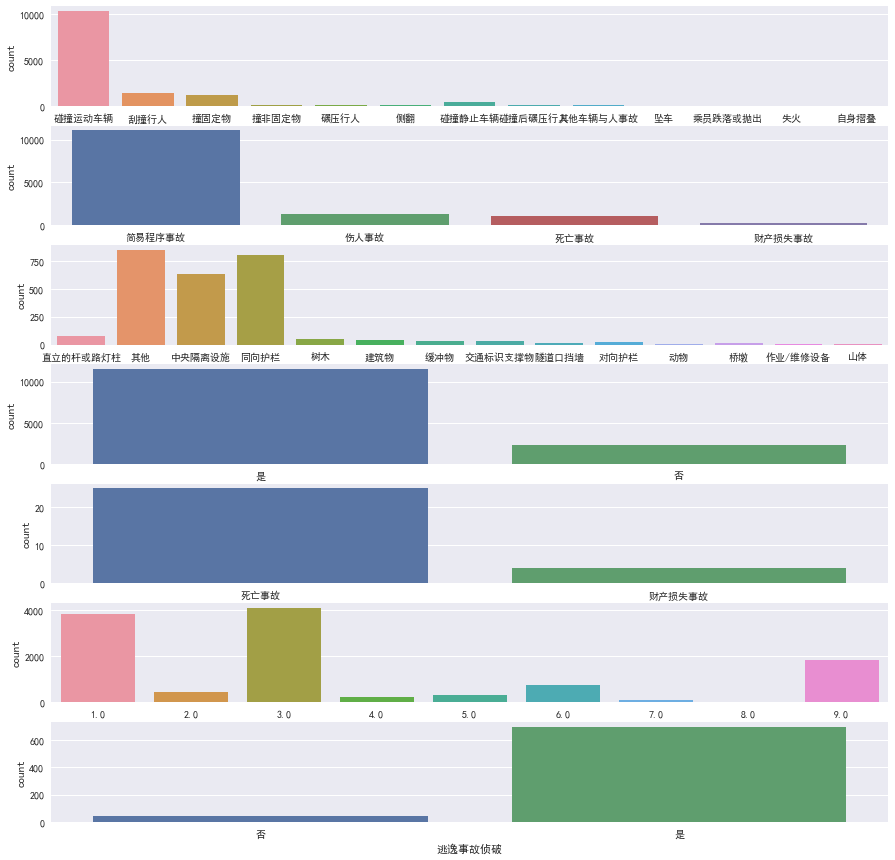

In [53]:
fig,axises = plt.subplots(7,1,figsize=(15,15))
x=0
for i in test_reason.columns:
    sns.countplot(test_reason[i],ax=axises[x])
#     axises[x].set_title(u'%s'%(i+'分布图'))
    x = x+1

In [54]:
test_reason.columns

Index(['事故形态', '事故类型', '单车事故', '是否简易程序', '路外事故类型', '车辆间事故.1', '逃逸事故侦破'], dtype='object')

In [73]:
print(len(test_reason))
print(sum(test_reason['逃逸事故侦破'].isnull())/len(test_reason))

13767
0.946538824726


## 1.2 事故原因分析

In [55]:
test_reason_2 = test[['事故初查原因','事故初查原因分类','事故认定原因','事故认定原因分类小类']]

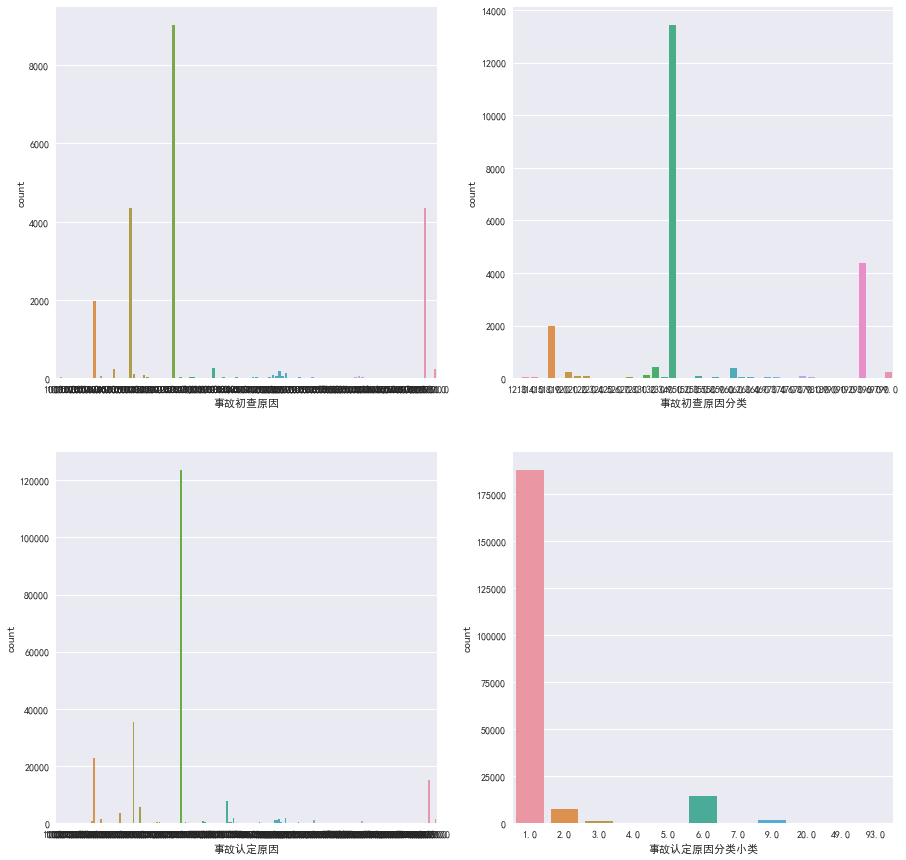

In [56]:
fig,axises = plt.subplots(2,2,figsize=(15,15))
x=0
y=0
for i in test_reason_2.columns:
    sns.countplot(test_reason_2[i],ax=axises[x,y])
#     axises[x].set_title(u'%s'%(i+'分布图'))
    y = y+1
    if y==2:
        x += 1
        y=0

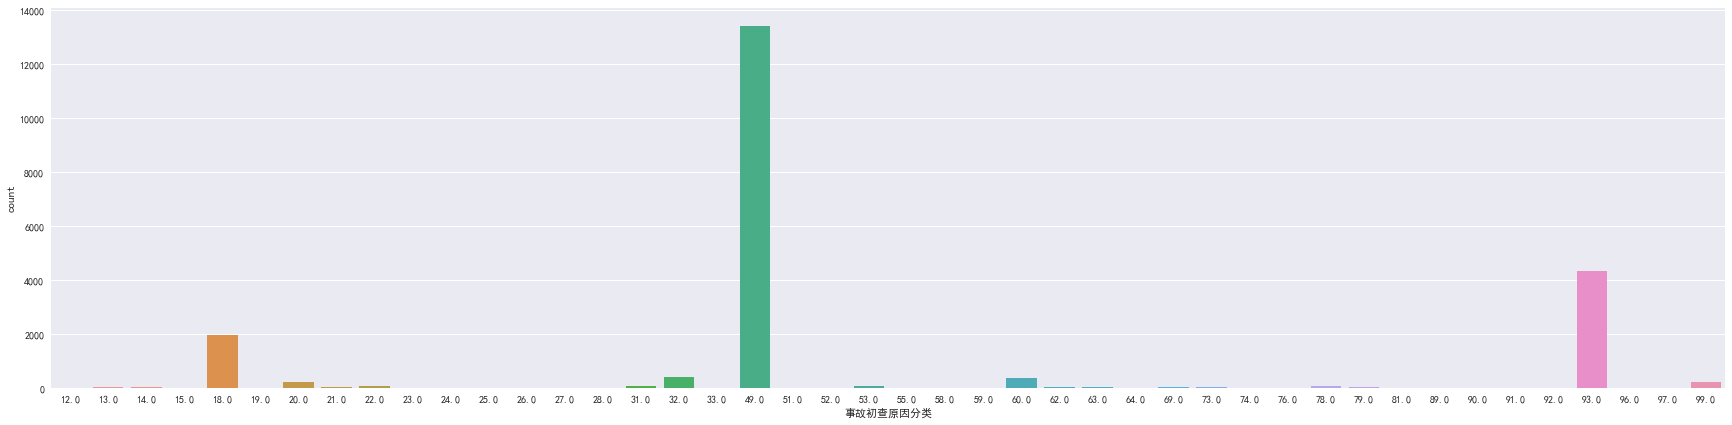

In [58]:
fig,axises = plt.subplots(1,1,figsize=(30,7))
sns.countplot(test_reason_2['事故初查原因分类'],ax=axises)

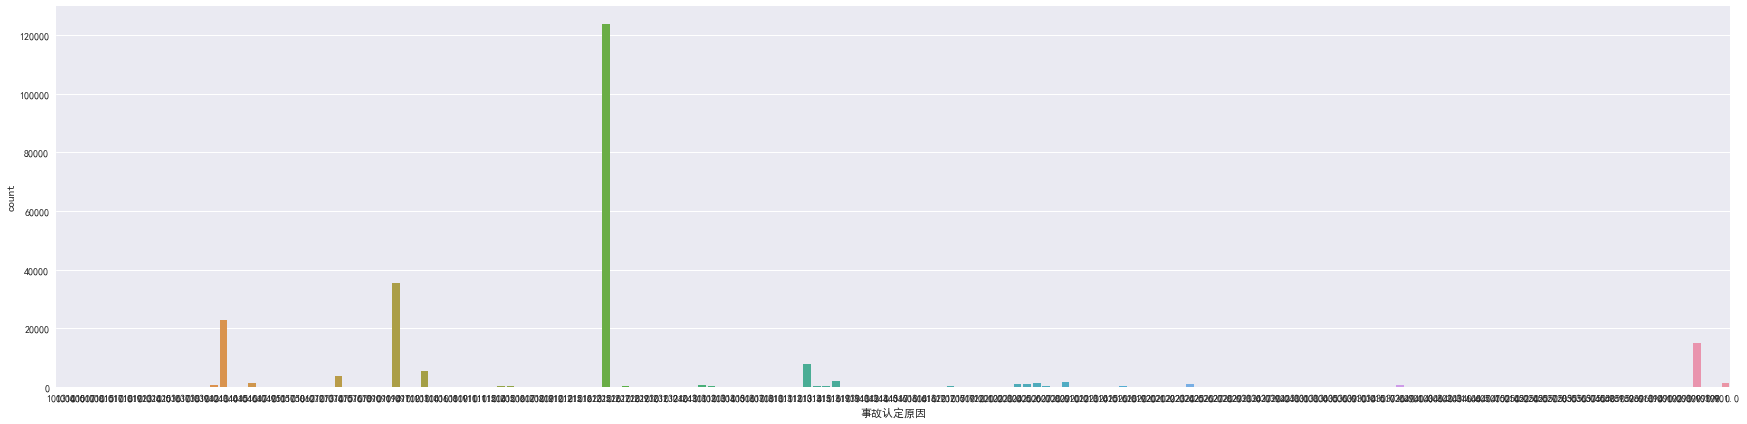

In [61]:
fig,axises = plt.subplots(1,1,figsize=(30,7))
sns.countplot(test_reason_2['事故认定原因'],ax=axises)

In [62]:
test_reason_2.columns

Index(['事故初查原因', '事故初查原因分类', '事故认定原因', '事故认定原因分类小类'], dtype='object')

## 1.3 事故严重性信息分析

In [67]:
test_severity = data[['受伤人数','失踪人数','当事人总数','抢救死亡人数Q','损坏机动车数','损坏非机动车数','机动车数量','死亡人数',\
                      '直接财产损失','米数','轻伤人数','重伤人数','非机动车数量']]

In [68]:
for i in test_severity.columns:
    print('%s：%s'%(i,sum(test_severity[i].isnull())/len(test_severity)))

受伤人数：0.0
失踪人数：0.0
当事人总数：0.96347092632
抢救死亡人数Q：0.0
损坏机动车数：0.0
损坏非机动车数：0.0
机动车数量：0.96347092632
死亡人数：0.0
直接财产损失：0.0
米数：0.666810960008
轻伤人数：0.0
重伤人数：0.0
非机动车数量：0.96347092632


In [70]:
test_severity_noNan = test_severity.dropna(axis=0,subset=['当事人总数'],how='any')
for i in test_severity_noNan.columns:
    print('%s：%s'%(i,sum(test_severity_noNan[i].isnull())/len(test_severity_noNan)))

受伤人数：0.0
失踪人数：0.0
当事人总数：0.0
抢救死亡人数Q：0.0
损坏机动车数：0.0
损坏非机动车数：0.0
机动车数量：0.0
死亡人数：0.0
直接财产损失：0.0
米数：0.000703977472721
轻伤人数：0.0
重伤人数：0.0
非机动车数量：0.0


In [71]:
test_severity_noNan = test_severity_noNan.dropna(axis=0,subset=['米数'],how='any')
print(len(test_severity_noNan))

8517


## 2 新一轮

In [202]:
xls = pd.ExcelFile('2014年基本信息表.xls')
data_upperHalf = xls.parse('基本信息表2014上半年')
data_lowerHalf = xls.parse('基本信息表2014下半年')
data = pd.DataFrame()
data = pd.concat([data_upperHalf,data_lowerHalf],ignore_index=True)

xls = pd.ExcelFile('2015年基本信息表.xls')
data_upperHalf = xls.parse('基本信息表2015年上半年')
data_lowerHalf = xls.parse('基本信息表2015年上半年')
data = pd.concat([data,data_upperHalf,data_lowerHalf],ignore_index=True)

xls = pd.ExcelFile('2016年基本信息表.xls')
data_upperHalf = xls.parse('2016年上半年基本信息表')
data_lowerHalf = xls.parse('2016年下半年基本信息表')
data = pd.concat([data,data_upperHalf,data_lowerHalf],ignore_index=True)
xls.close()

del data_upperHalf
del data_lowerHalf

print(len(data))

233321


In [203]:
data_accident = data[['事故编号','公安部事故编号','所属中队','文书状态','所辖乡镇','现场','行政区划','调解人1','调解人2',\
                         '受伤人数','失踪人数','当事人总数','抢救死亡人数Q','损坏机动车数','损坏非机动车数','机动车数量','死亡人数',\
                      '直接财产损失','米数','轻伤人数','重伤人数','非机动车数量','行人数量',\
                          '事故发生时间','星期','事故地点','路号','路名',\
                          '事故形态','事故类型','单车事故','是否简易程序','路外事故类型','车辆间事故.1','逃逸事故侦破',\
                          '事故初查原因','事故初查原因分类','事故认定原因','事故认定原因分类小类']]
data_accident.head()

事故编号  公安部事故编号  所属中队  文书状态         所辖乡镇   现场    行政区划  调解人1  调解人2  \
0  440303201402052      NaN   NaN   NaN  440305005.0  2.0  440305   NaN   NaN   
1  440307201400740      NaN   NaN   NaN  440307004.0  2.0  440307   NaN   NaN   
2  440399201400875      NaN   NaN   NaN  440307004.0  1.0  440307   NaN   NaN   
3  440309201404111      NaN   NaN   NaN  440306004.0  1.0  440306   NaN   NaN   
4  440309201406521      NaN   NaN   NaN  440306002.0  1.0  440306   NaN   NaN   

   受伤人数     ...      事故类型  单车事故  是否简易程序  路外事故类型  车辆间事故.1  逃逸事故侦破  事故初查原因  \
0     0     ...         1   NaN       2     NaN      1.0     NaN  9901.0   
1     0     ...         1    39       2     NaN      2.0     NaN  1225.0   
2     0     ...         1   NaN       2     NaN      3.0     NaN  1094.0   
3     0     ...         1   NaN       2     NaN      NaN     NaN  1225.0   
4     1     ...         1   NaN       2     NaN      6.0     NaN  2009.0   

   事故初查原因分类  事故认定原因  事故认定原因分类小类  
0      99.0  9901.0         NaN  
1      49.0  1225.0         1.0  
2      49.0  1225.0         1.0  
3      49.0  1225.0         1.0  
4      60.0  2009.0         2.0  

[5 rows x 39 columns]

In [206]:
for i in data_accident.columns:
    print('%s：%s'%(i,sum(data_accident[i].isnull())/len(data_accident)))

事故编号：0.0
公安部事故编号：0.99963998097
所属中队：0.640293844103
文书状态：1.0
所辖乡镇：0.00988766549089
现场：0.963406637208
行政区划：0.0
调解人1：1.0
调解人2：1.0
受伤人数：0.0
失踪人数：0.0
当事人总数：0.96347092632
抢救死亡人数Q：0.0
损坏机动车数：0.0
损坏非机动车数：0.0
机动车数量：0.96347092632
死亡人数：0.0
直接财产损失：0.0
米数：0.666810960008
轻伤人数：0.0
重伤人数：0.0
非机动车数量：0.96347092632
行人数量：0.96347092632
事故发生时间：0.0
星期：0.0
事故地点：0.0
路号：0.0882218060097
路名：0.0882732372997
事故形态：0.0890618504121
事故类型：0.0
单车事故：0.902113397422
是否简易程序：0.0
路外事故类型：0.999802846722
车辆间事故.1：0.237715422101
逃逸事故侦破：0.995872638982
事故初查原因：0.905812164357
事故初查原因分类：0.90582502218
事故认定原因：0.0103162595737
事故认定原因分类小类：0.0913762584594


## 2.1 删除缺省值较多特征

In [207]:
data_accident_2 = data_accident.drop(['公安部事故编号','所属中队','文书状态','调解人1','调解人2',],axis=1)
for i in data_accident_2.columns:
    print('%s：%s'%(i,sum(data_accident_2[i].isnull())/len(data_accident_2)))

事故编号：0.0
所辖乡镇：0.00988766549089
现场：0.963406637208
行政区划：0.0
受伤人数：0.0
失踪人数：0.0
当事人总数：0.96347092632
抢救死亡人数Q：0.0
损坏机动车数：0.0
损坏非机动车数：0.0
机动车数量：0.96347092632
死亡人数：0.0
直接财产损失：0.0
米数：0.666810960008
轻伤人数：0.0
重伤人数：0.0
非机动车数量：0.96347092632
行人数量：0.96347092632
事故发生时间：0.0
星期：0.0
事故地点：0.0
路号：0.0882218060097
路名：0.0882732372997
事故形态：0.0890618504121
事故类型：0.0
单车事故：0.902113397422
是否简易程序：0.0
路外事故类型：0.999802846722
车辆间事故.1：0.237715422101
逃逸事故侦破：0.995872638982
事故初查原因：0.905812164357
事故初查原因分类：0.90582502218
事故认定原因：0.0103162595737
事故认定原因分类小类：0.0913762584594


In [208]:
print(data_accident_2.columns)
print(len(data_accident_2))

Index(['事故编号', '所辖乡镇', '现场', '行政区划', '受伤人数', '失踪人数', '当事人总数', '抢救死亡人数Q',
       '损坏机动车数', '损坏非机动车数', '机动车数量', '死亡人数', '直接财产损失', '米数', '轻伤人数', '重伤人数',
       '非机动车数量', '行人数量', '事故发生时间', '星期', '事故地点', '路号', '路名', '事故形态', '事故类型',
       '单车事故', '是否简易程序', '路外事故类型', '车辆间事故.1', '逃逸事故侦破', '事故初查原因', '事故初查原因分类',
       '事故认定原因', '事故认定原因分类小类'],
      dtype='object')
233321


In [15]:
data_accident_2.head()

事故编号         所辖乡镇   现场    行政区划  受伤人数  失踪人数  当事人总数  抢救死亡人数Q  \
0  440303201402052  440305005.0  2.0  440305     0     0    7.0        0   
1  440307201400740  440307004.0  2.0  440307     0     0    3.0        0   
2  440399201400875  440307004.0  1.0  440307     0     0    3.0        0   
3  440309201404111  440306004.0  1.0  440306     0     0    3.0        0   
4  440309201406521  440306002.0  1.0  440306     1     0    2.0        0   

   损坏机动车数  损坏非机动车数     ...      事故类型  单车事故  是否简易程序  路外事故类型  车辆间事故.1  逃逸事故侦破  \
0       0        0     ...         1   NaN       2     NaN      1.0     NaN   
1       0        0     ...         1    39       2     NaN      2.0     NaN   
2       0        0     ...         1   NaN       2     NaN      3.0     NaN   
3       0        0     ...         1   NaN       2     NaN      NaN     NaN   
4       0        0     ...         1   NaN       2     NaN      6.0     NaN   

   事故初查原因  事故初查原因分类  事故认定原因  事故认定原因分类小类  
0  9901.0      99.0  9901.0         NaN  
1  1225.0      49.0  1225.0         1.0  
2  1094.0      49.0  1225.0         1.0  
3  1225.0      49.0  1225.0         1.0  
4  2009.0      60.0  2009.0         2.0  

[5 rows x 34 columns]

## 2.2 处理事故类型特征 

In [214]:
data_accidentType = data_accident_2[['事故形态','事故类型','单车事故','是否简易程序','路外事故类型','车辆间事故.1','逃逸事故侦破']]
for i in data_accidentType.columns:
    print('%s：%s'%(i,sum(data_accidentType[i].isnull())/len(data_accidentType)))
print(len(data_accident_2))

事故形态：0.0890618504121
事故类型：0.0
单车事故：0.902113397422
是否简易程序：0.0
路外事故类型：0.999802846722
车辆间事故.1：0.237715422101
逃逸事故侦破：0.995872638982
233321


In [215]:
data_accidentType = data_accidentType[data_accidentType.事故形态.isin(['碰撞运动车辆','其他车辆事故',\
                                                '刮撞行人','撞固定物',\
                                                '撞非固定物','碾压行人',\
                                                '侧翻','碰撞静止车辆',\
                                                '碰撞后碾压行人','其他车辆与人事故',\
                                                '坠车','乘员跌落或抛出',\
                                                '翻滚','失火','自身摺叠'])]
print(len(data_accidentType))

162413


In [216]:
for i in data_accidentType.columns:
    print('%s：%s'%(i,sum(data_accidentType[i].isnull())/len(data_accidentType)))

事故形态：0.0
事故类型：0.0
单车事故：0.888149347651
是否简易程序：0.0
路外事故类型：0.999815285722
车辆间事故.1：0.176137378166
逃逸事故侦破：0.995289785916


### 2.2.1 处理缺失数据

#### 2.2.1.1 路外事故类型

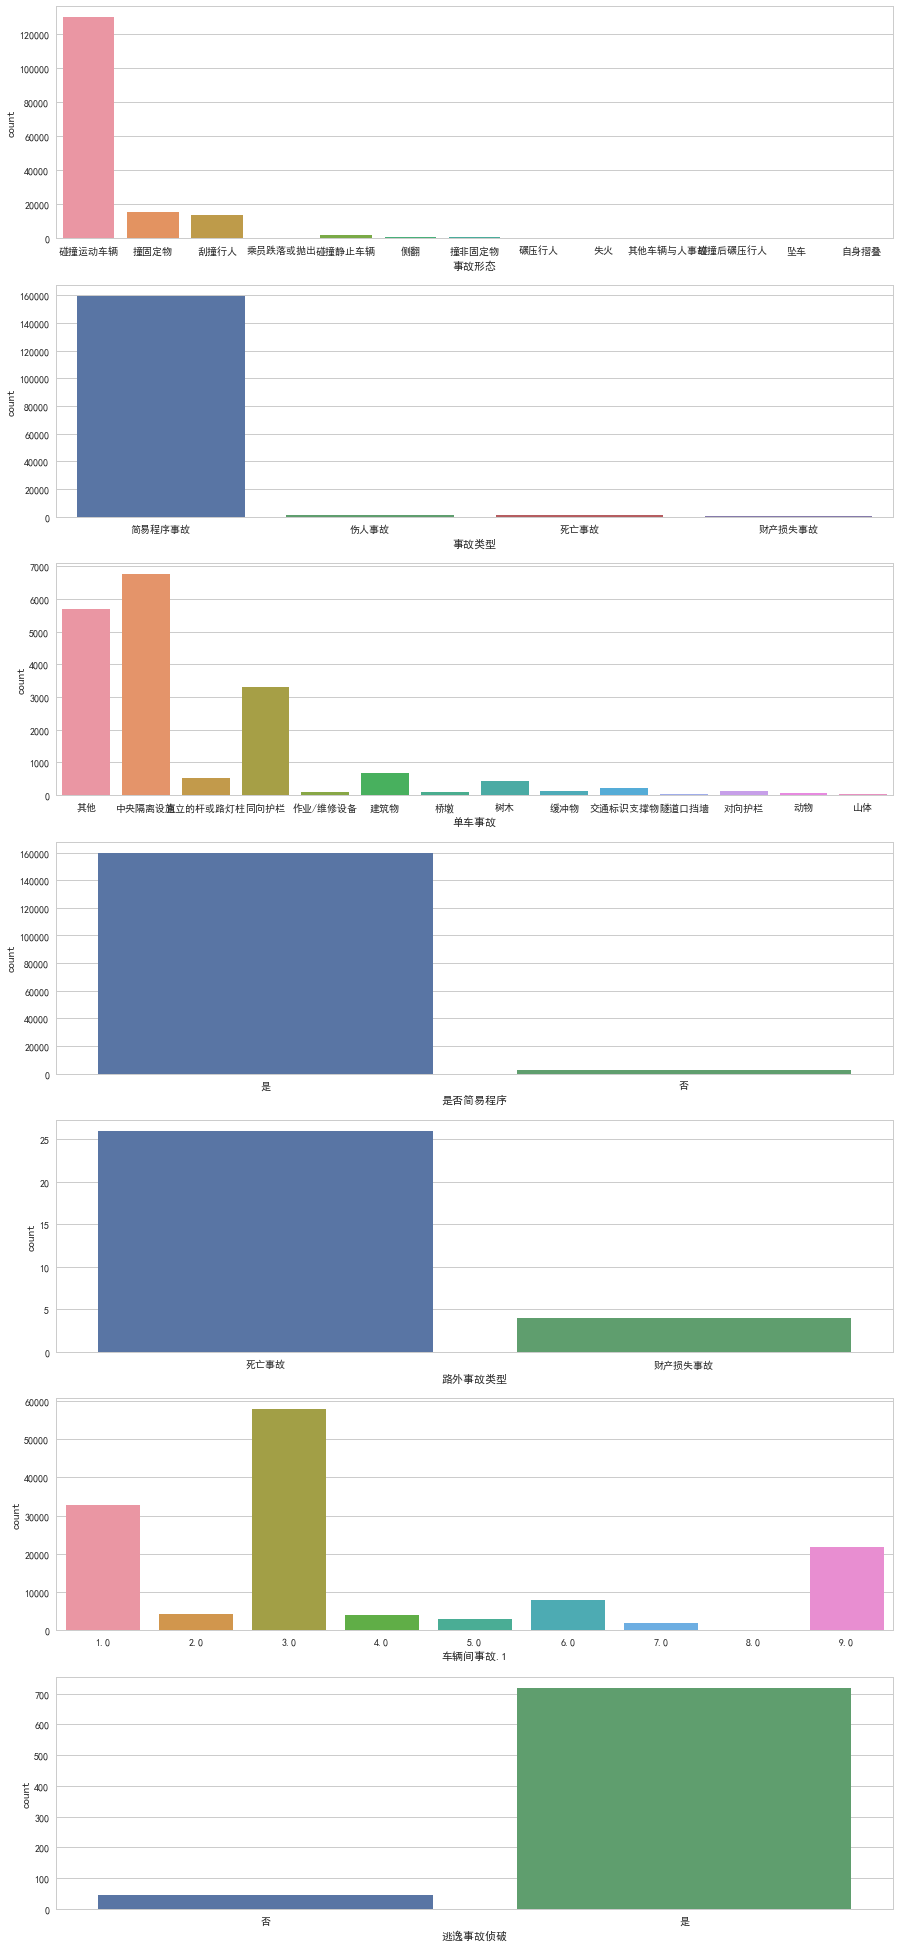

In [219]:
fig,axises = plt.subplots(7,1,figsize=(15,35))
x=0
for i in data_accidentType.columns:
    sns.countplot(data_accidentType[i],ax=axises[x])
#     axises[x].set_title(u'%s'%(i+'分布图'))
    x += 1

In [220]:
data_accidentType_outRoad = data_accidentType.dropna(subset=['路外事故类型'],how='any',axis=0)
print(len(data_accidentType_outRoad))

30


ValueError: min() arg is an empty sequence

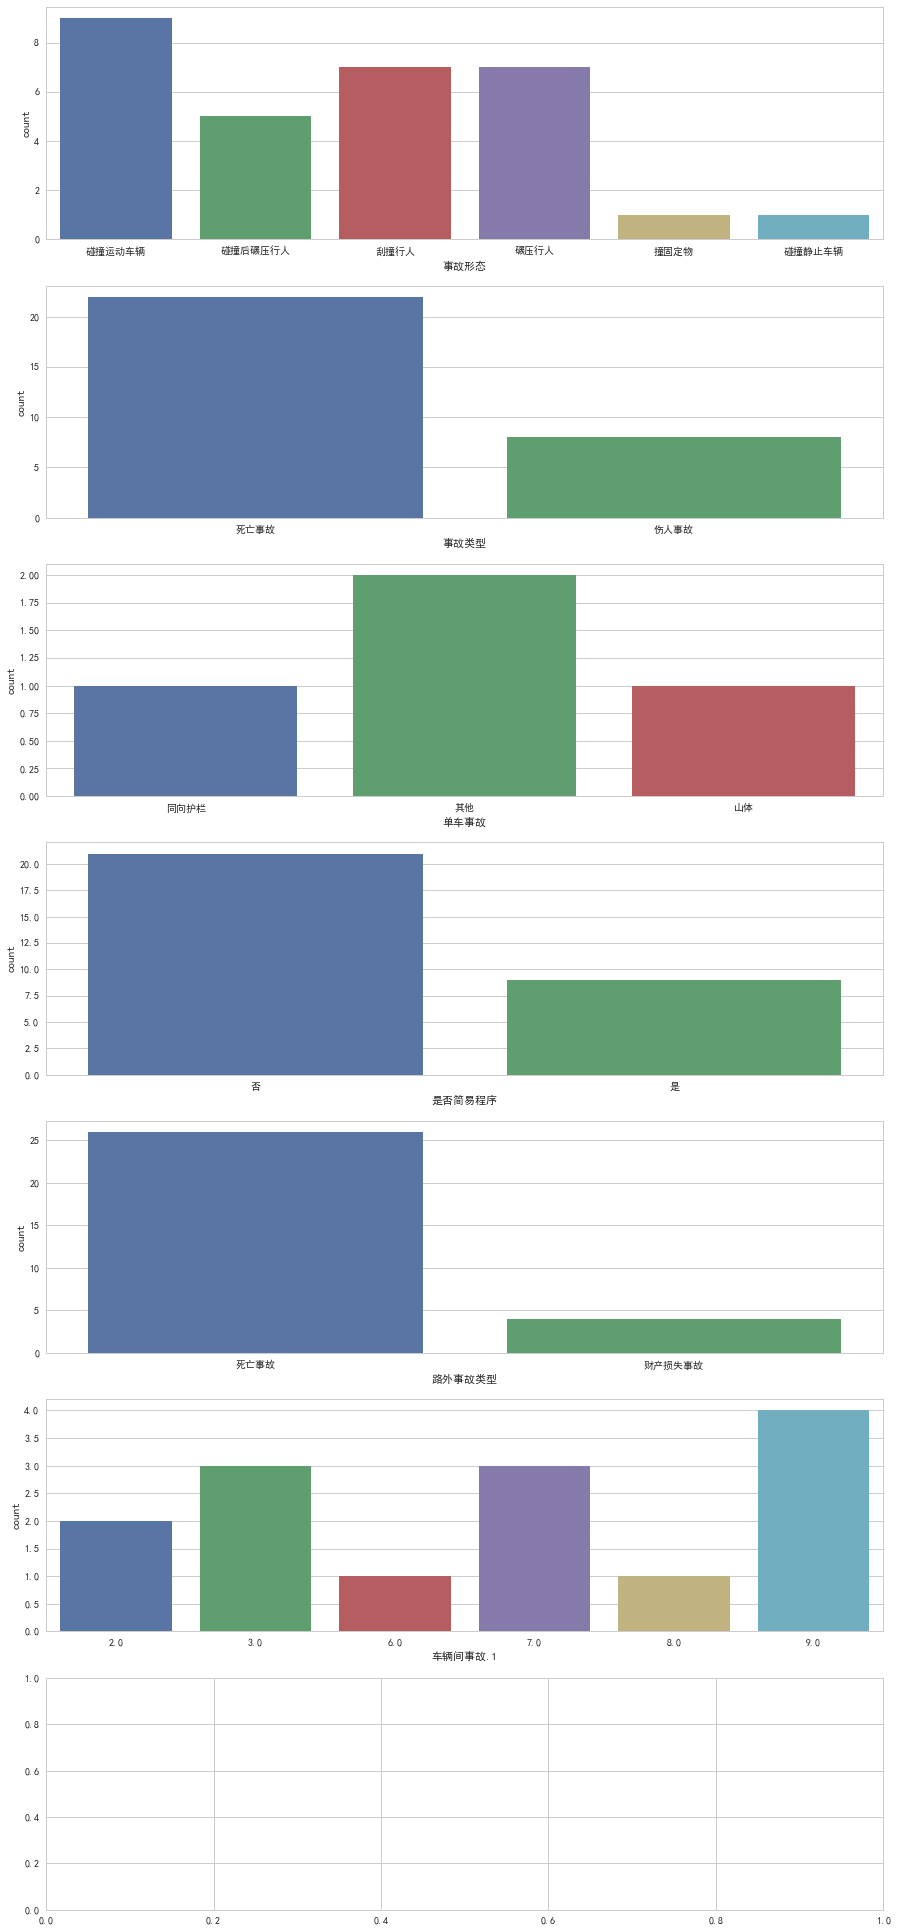

In [221]:
fig,axises = plt.subplots(7,1,figsize=(15,35))
x=0
for i in data_accidentType_outRoad.columns:
    sns.countplot(data_accidentType_outRoad[i],ax=axises[x])
#     axises[x].set_title(u'%s'%(i+'分布图'))
    x += 1

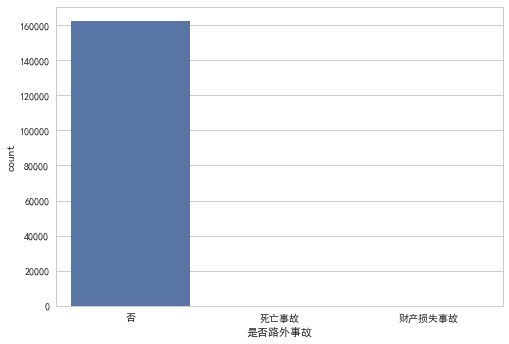

In [222]:
# sns.countplot(data_accidentType['路外事故类型'])
data_accidentType['路外事故类型'].fillna('否',inplace=True)
data_accidentType.rename(columns={'路外事故类型':'是否路外事故'},inplace=True)
sns.countplot(data_accidentType['是否路外事故'])

In [223]:
for i in data_accidentType.columns:
    print('%s：%s'%(i,sum(data_accidentType[i].isnull())/len(data_accidentType)))
print(len(data_accidentType))

事故形态：0.0
事故类型：0.0
单车事故：0.888149347651
是否简易程序：0.0
是否路外事故：0.0
车辆间事故.1：0.176137378166
逃逸事故侦破：0.995289785916
162413


#### 2.2.1.2 逃逸事故侦破

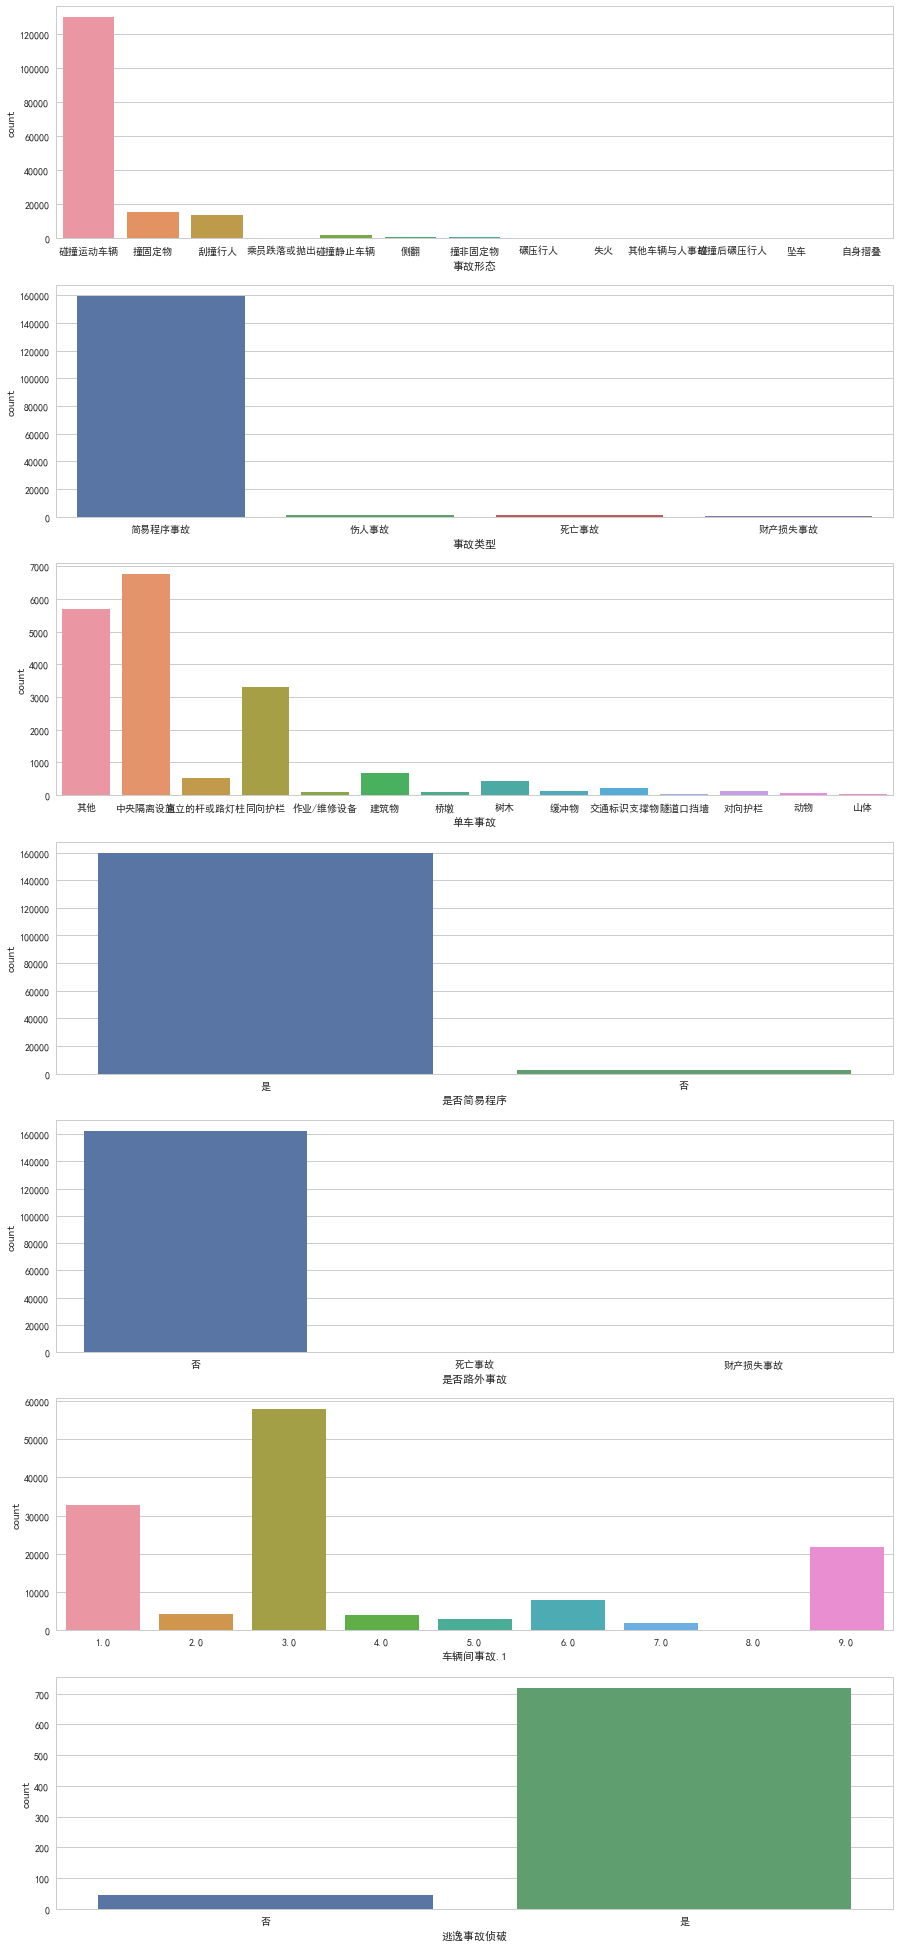

In [224]:
fig,axises = plt.subplots(7,1,figsize=(15,35))
x=0
for i in data_accidentType.columns:
    sns.countplot(data_accidentType[i],ax=axises[x])
#     axises[x].set_title(u'%s'%(i+'分布图'))
    x += 1

In [225]:
data_accidentType_escape = data_accidentType.dropna(subset=['逃逸事故侦破'],axis=0,how='any')
print(len(data_accidentType_escape))

765


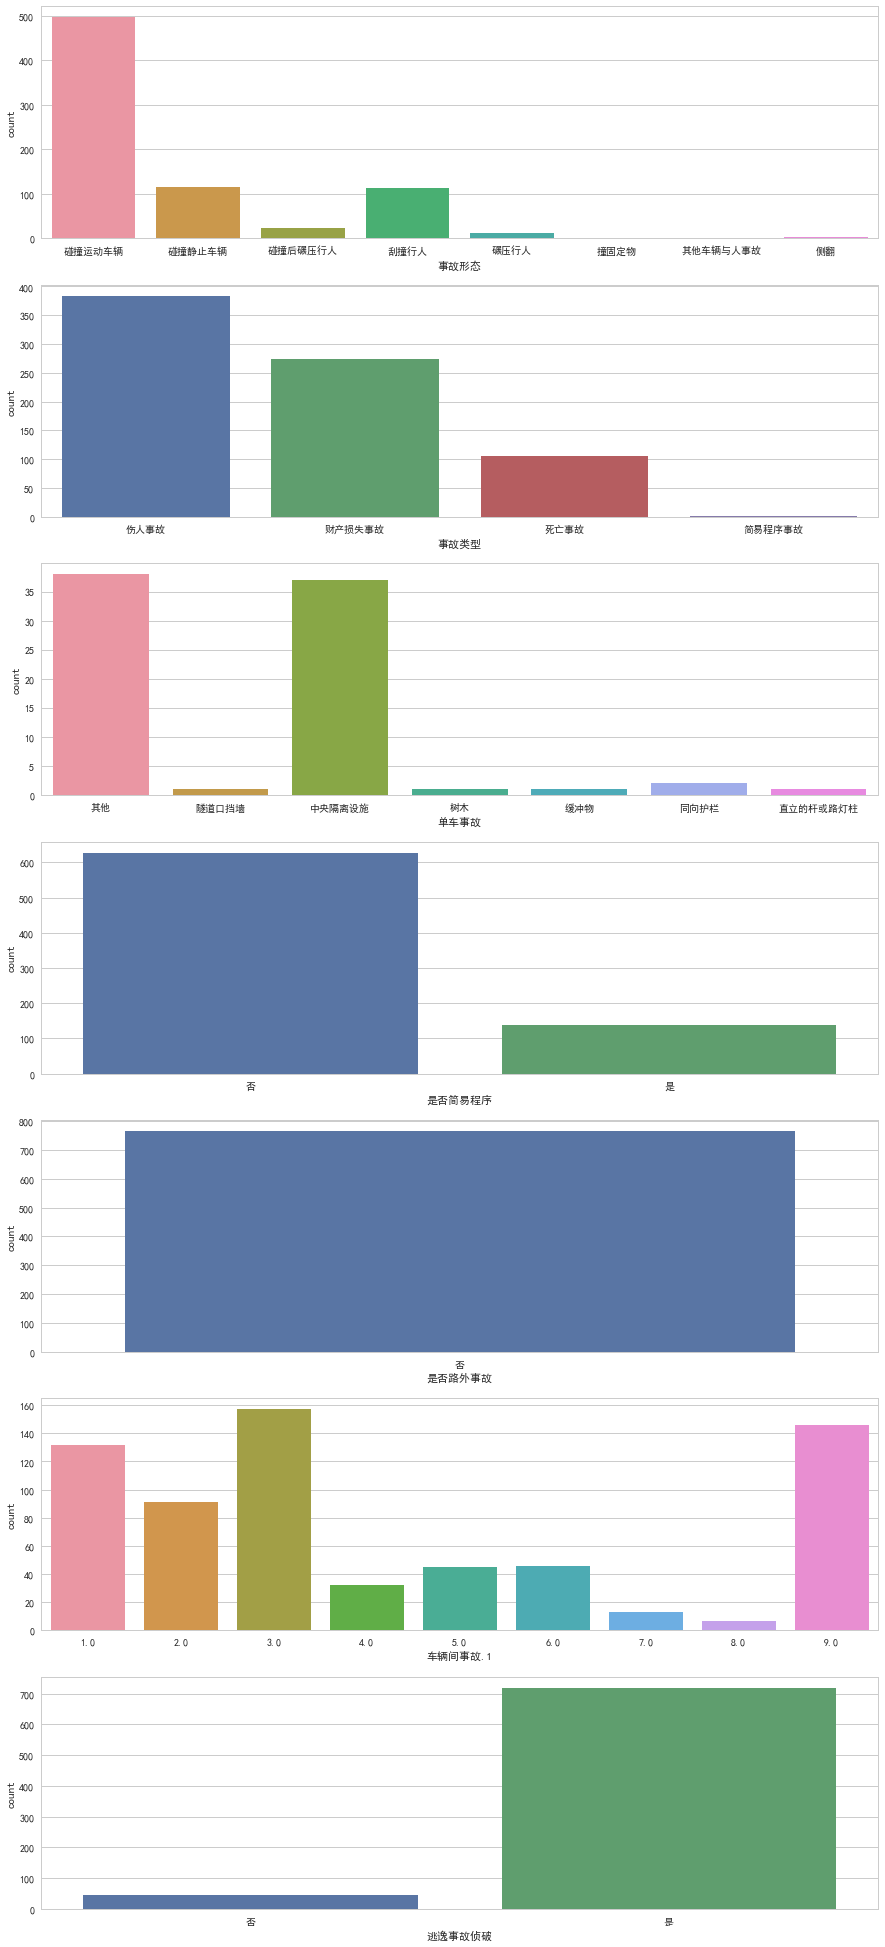

In [226]:
#由此可见，存在逃逸事故侦破的事故一般  事故类型：伤人、财产损失、死亡更多，事故形态：碰撞运动车辆多 较为严重
fig,axises = plt.subplots(7,1,figsize=(15,35))
x=0
for i in data_accidentType_escape.columns:
    sns.countplot(data_accidentType_escape[i],ax=axises[x])
#     axises[x].set_title(u'%s'%(i+'分布图'))
    x += 1

In [227]:
for i in data_accidentType_escape.columns:
    print('%s：%s'%(i,sum(data_accidentType_escape[i].isnull())/len(data_accidentType_escape)))

事故形态：0.0
事故类型：0.0
单车事故：0.894117647059
是否简易程序：0.0
是否路外事故：0.0
车辆间事故.1：0.125490196078
逃逸事故侦破：0.0


##### 填充  逃逸事故侦破

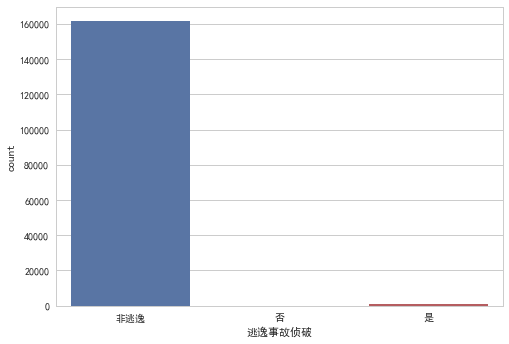

In [228]:
data_accidentType['逃逸事故侦破'].fillna('非逃逸',inplace=True)
sns.countplot(data_accidentType['逃逸事故侦破'])

In [229]:
for i in data_accidentType.columns:
    print('%s：%s'%(i,sum(data_accidentType[i].isnull())/len(data_accidentType)))
print(len(data_accidentType))

事故形态：0.0
事故类型：0.0
单车事故：0.888149347651
是否简易程序：0.0
是否路外事故：0.0
车辆间事故.1：0.176137378166
逃逸事故侦破：0.0
162413


#### 2.2.1.3 单车事故

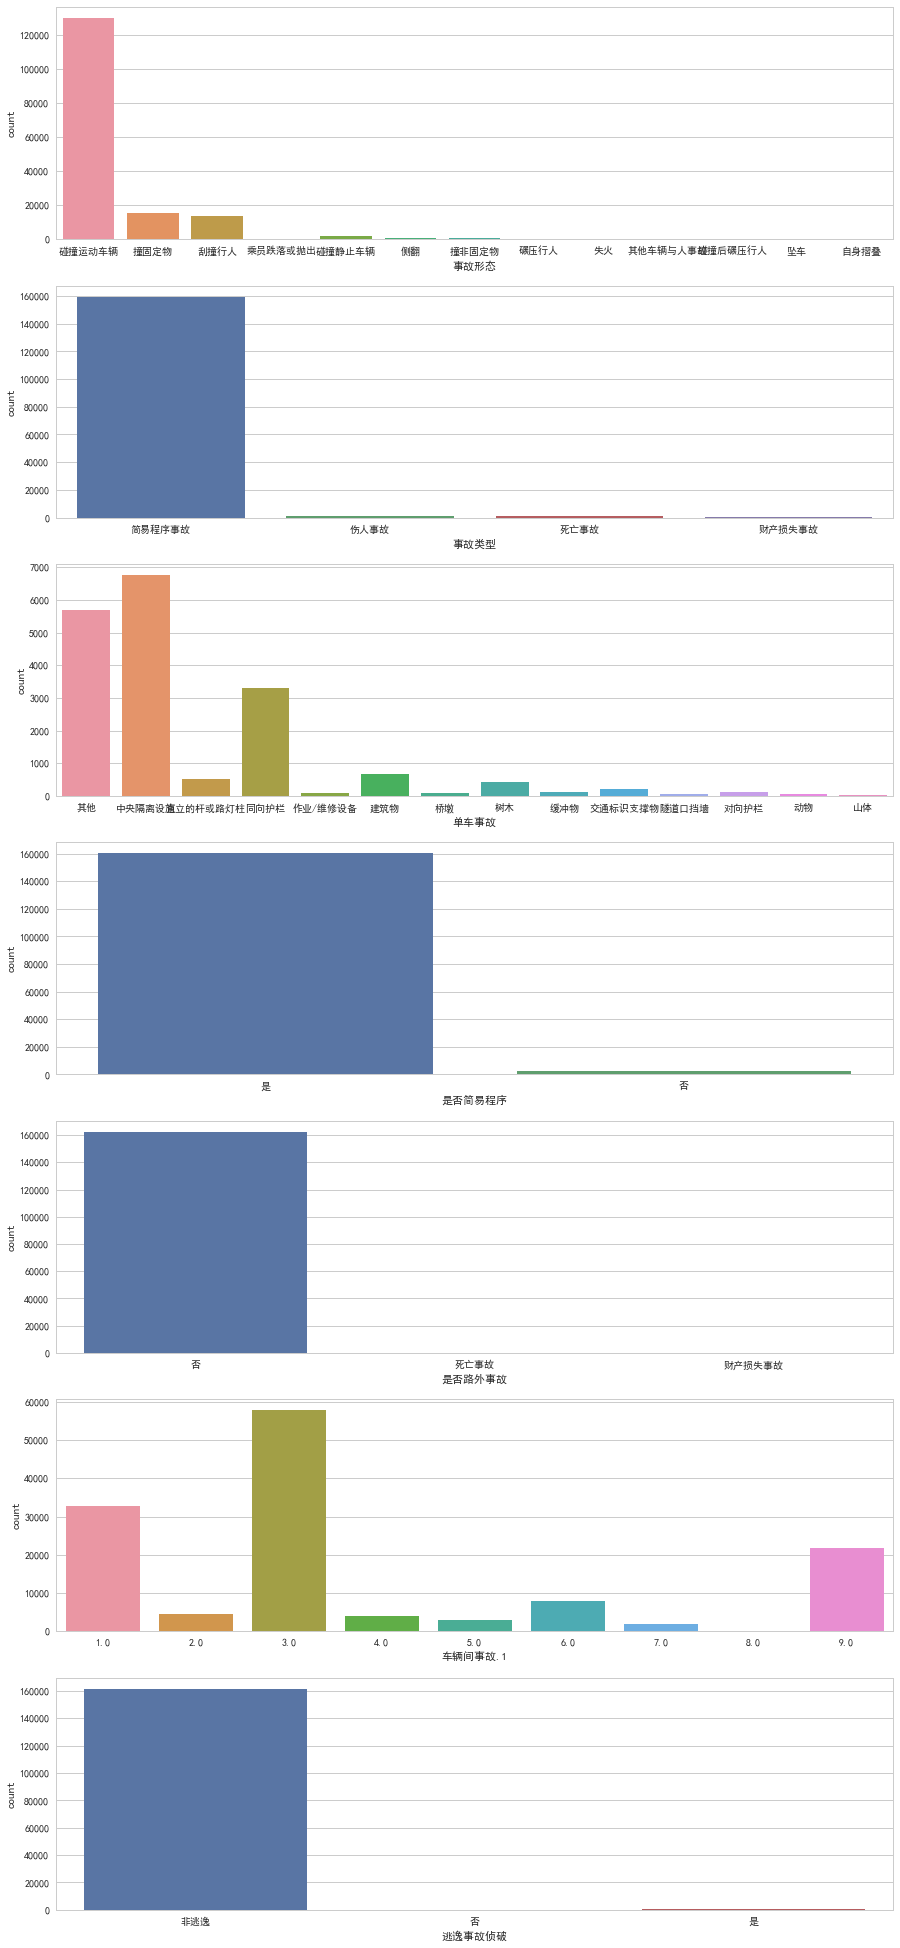

In [230]:
#原数据
fig,axises = plt.subplots(7,1,figsize=(15,35))
x=0
for i in data_accidentType.columns:
    sns.countplot(data_accidentType[i],ax=axises[x])
#     axises[x].set_title(u'%s'%(i+'分布图'))
    x += 1

In [231]:
data_accidentType_singleVehicle = data_accidentType.dropna(subset=['单车事故'],axis=0,how='any')
print(len(data_accidentType_singleVehicle))

18166


In [232]:
for i in data_accidentType_singleVehicle.columns:
    print('%s：%s'%(i,sum(data_accidentType_singleVehicle[i].isnull())/len(data_accidentType_singleVehicle)))

事故形态：0.0
事故类型：0.0
单车事故：0.0
是否简易程序：0.0
是否路外事故：0.0
车辆间事故.1：0.88104150611
逃逸事故侦破：0.0


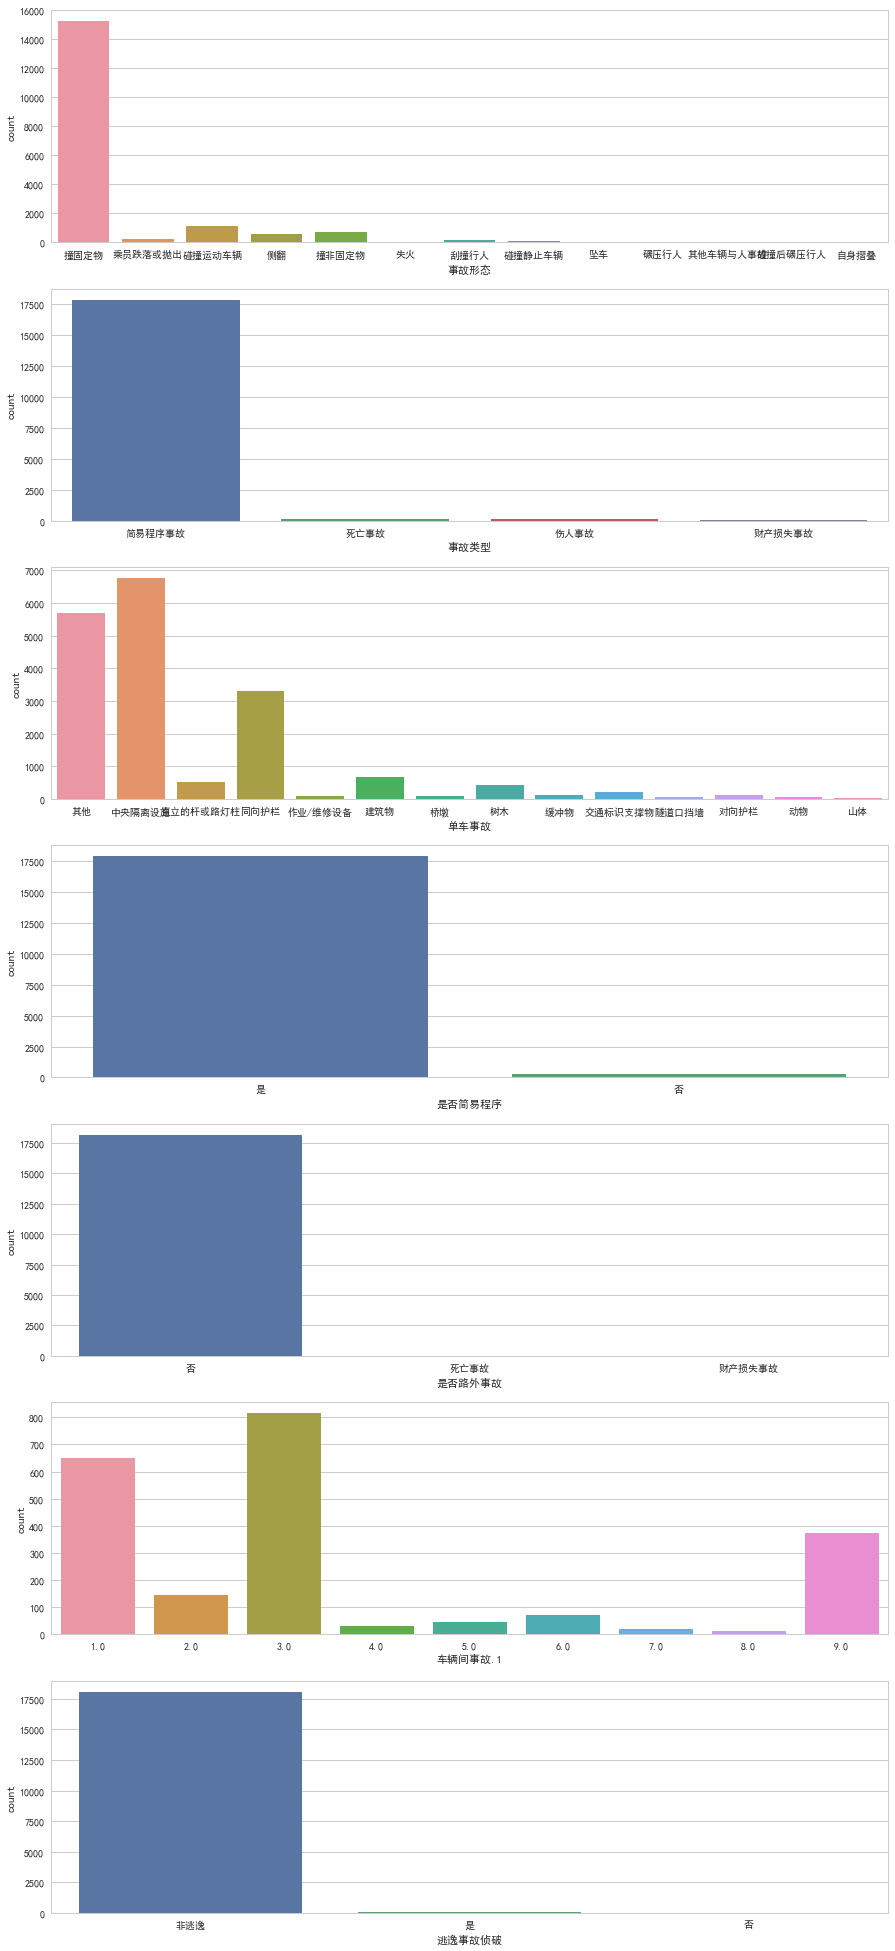

In [233]:
#单车事故 非空数据
fig,axises = plt.subplots(7,1,figsize=(15,35))
x=0
for i in data_accidentType_singleVehicle.columns:
    sns.countplot(data_accidentType_singleVehicle[i],ax=axises[x])
#     axises[x].set_title(u'%s'%(i+'分布图'))
    x += 1

##### 填充 单车事故 

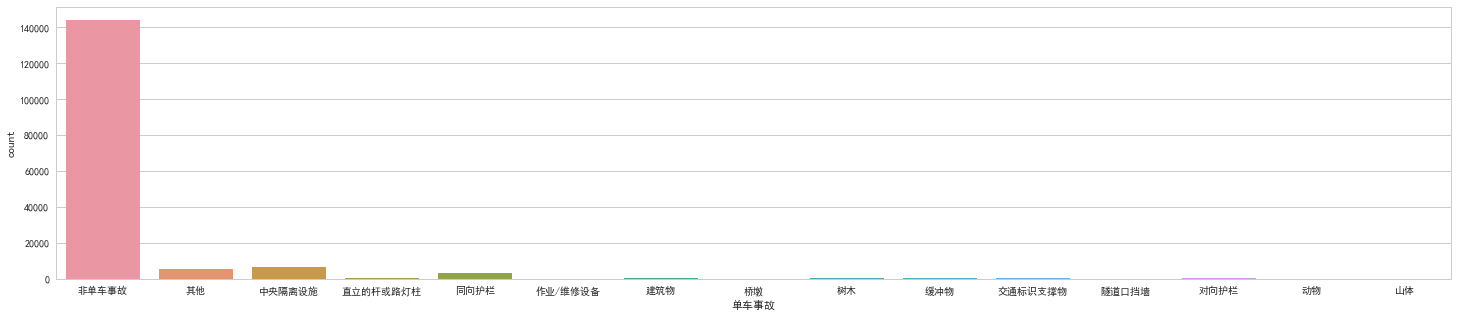

In [234]:
data_accidentType['单车事故'].fillna('非单车事故',inplace=True)
fig,axes = plt.subplots(1,1,figsize=(25,5))
sns.countplot(data_accidentType['单车事故'],ax=axes)

In [235]:
for i in data_accidentType:
    print('%s：%s'%(i,sum(data_accidentType[i].isnull())/len(data_accidentType)))
print(len(data_accidentType))

事故形态：0.0
事故类型：0.0
单车事故：0.0
是否简易程序：0.0
是否路外事故：0.0
车辆间事故.1：0.176137378166
逃逸事故侦破：0.0
162413


#### 2.2.1.4 车辆间事故.1

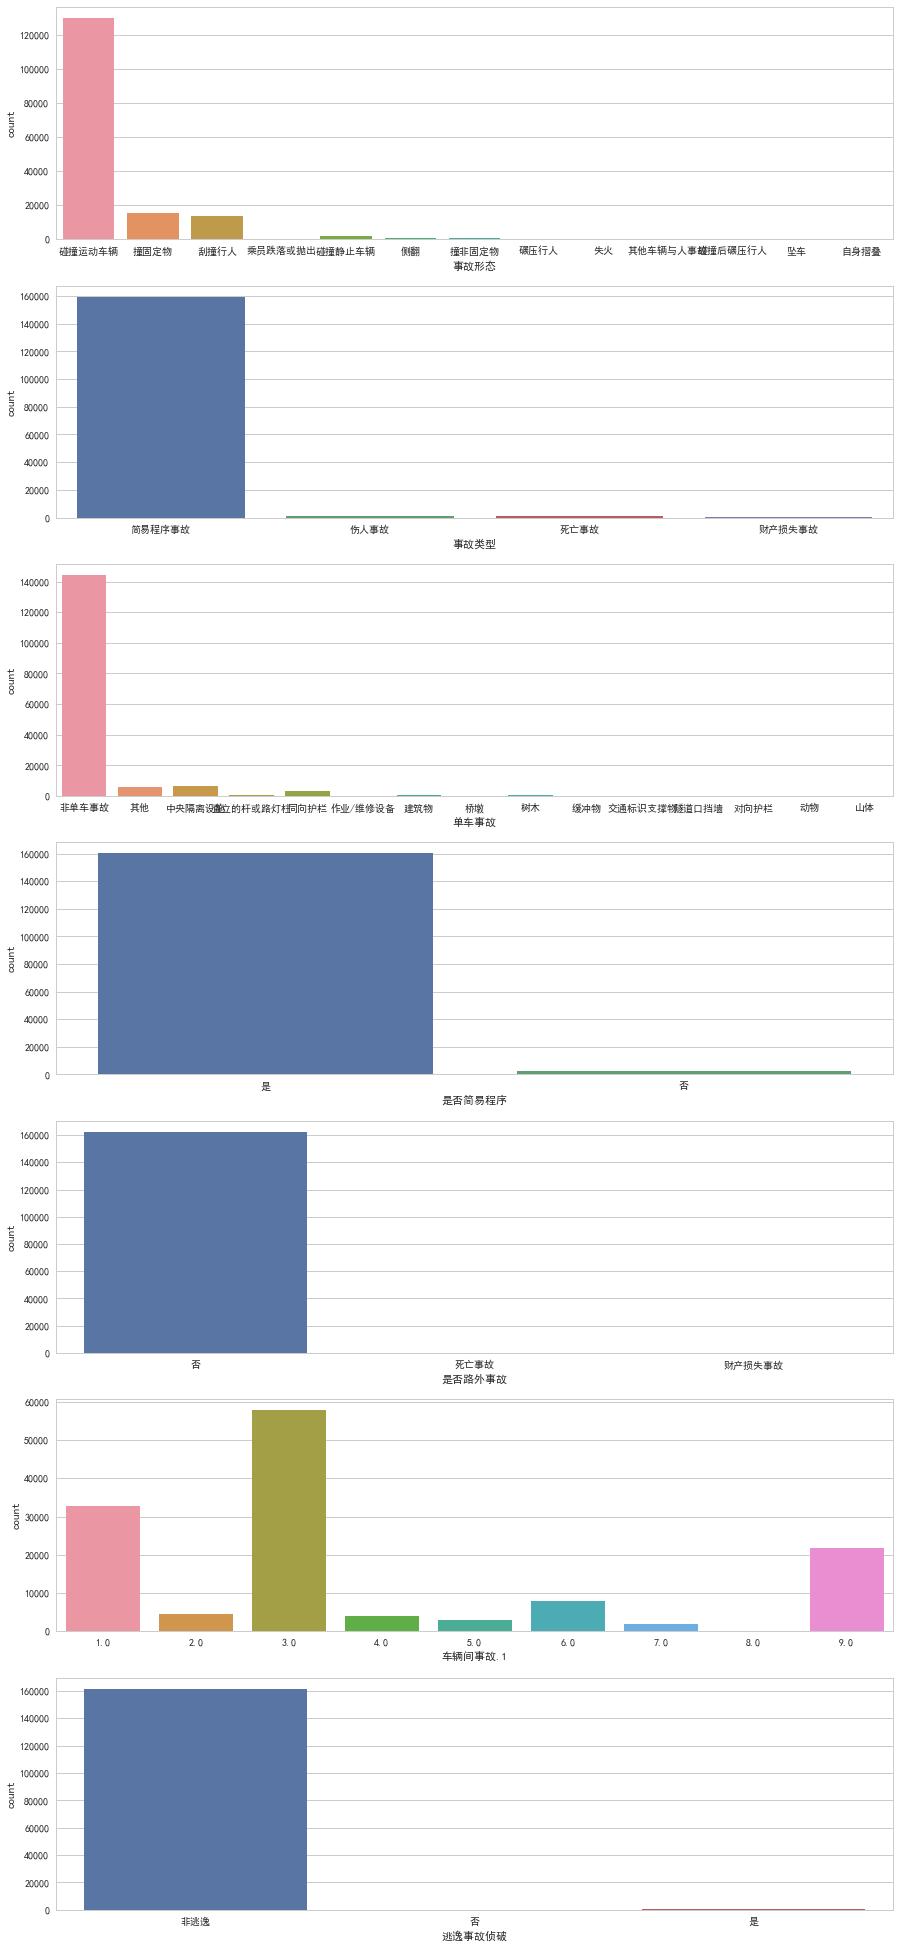

In [236]:
#原数据
fig,axises = plt.subplots(7,1,figsize=(15,35))
x=0
for i in data_accidentType.columns:
    sns.countplot(data_accidentType[i],ax=axises[x])
#     axises[x].set_title(u'%s'%(i+'分布图'))
    x += 1

In [237]:
data_accidentType_amongVeh = data_accidentType.dropna(subset=['车辆间事故.1'],axis=0,how='any')
print(len(data_accidentType_amongVeh))

133806


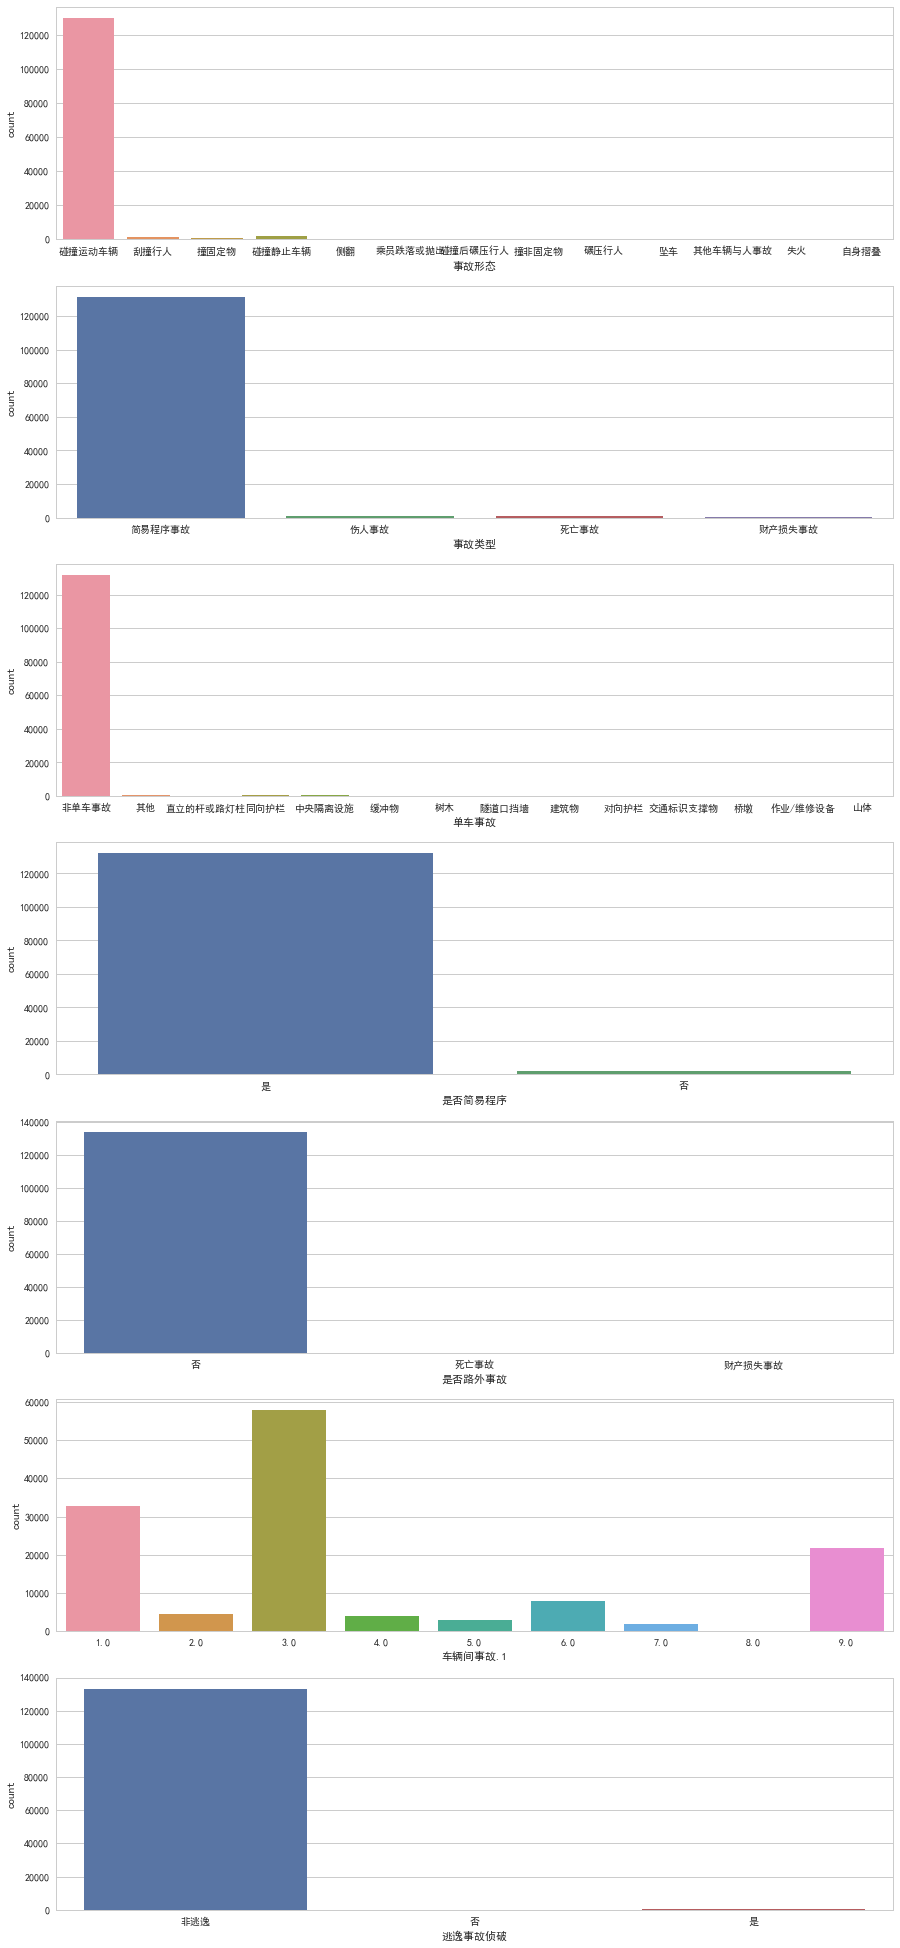

In [238]:
#原数据
fig,axises = plt.subplots(7,1,figsize=(15,35))
x=0
for i in data_accidentType_amongVeh.columns:
    sns.countplot(data_accidentType_amongVeh[i],ax=axises[x])
#     axises[x].set_title(u'%s'%(i+'分布图'))
    x += 1

#####  车辆间事故.1缺失率17.6%，且非空数据无明显特征，删除缺失数据

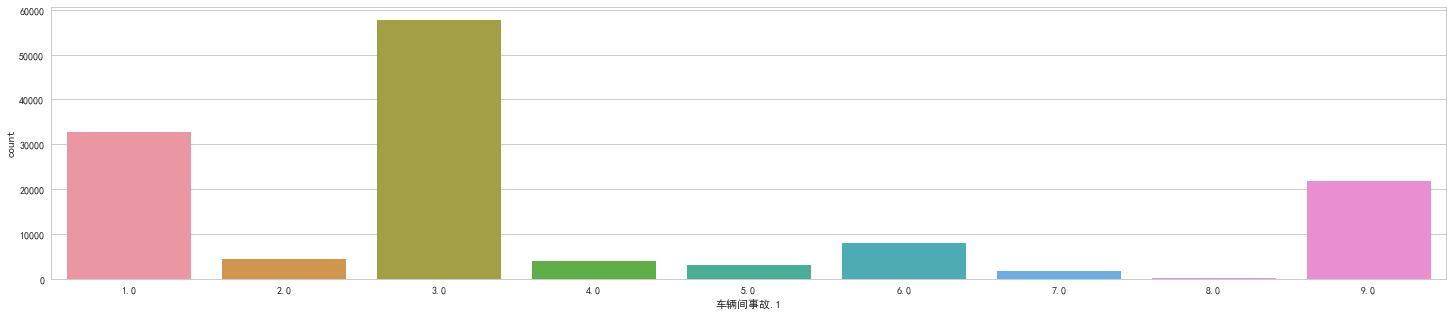

In [244]:
data_accidentType.dropna(subset=['车辆间事故.1'],how='any',axis=0,inplace=True)
fig,axes = plt.subplots(1,1,figsize=(25,5))
sns.countplot(data_accidentType['车辆间事故.1'],ax=axes)

In [245]:
for i in data_accidentType.columns:
    print('%s：%s'%(i,sum(data_accidentType[i].isnull())/len(data_accidentType)))
print(len(data_accidentType))

事故形态：0.0
事故类型：0.0
单车事故：0.0
是否简易程序：0.0
是否路外事故：0.0
车辆间事故.1：0.0
逃逸事故侦破：0.0
133806


### 2.2.2 查看处理后数据

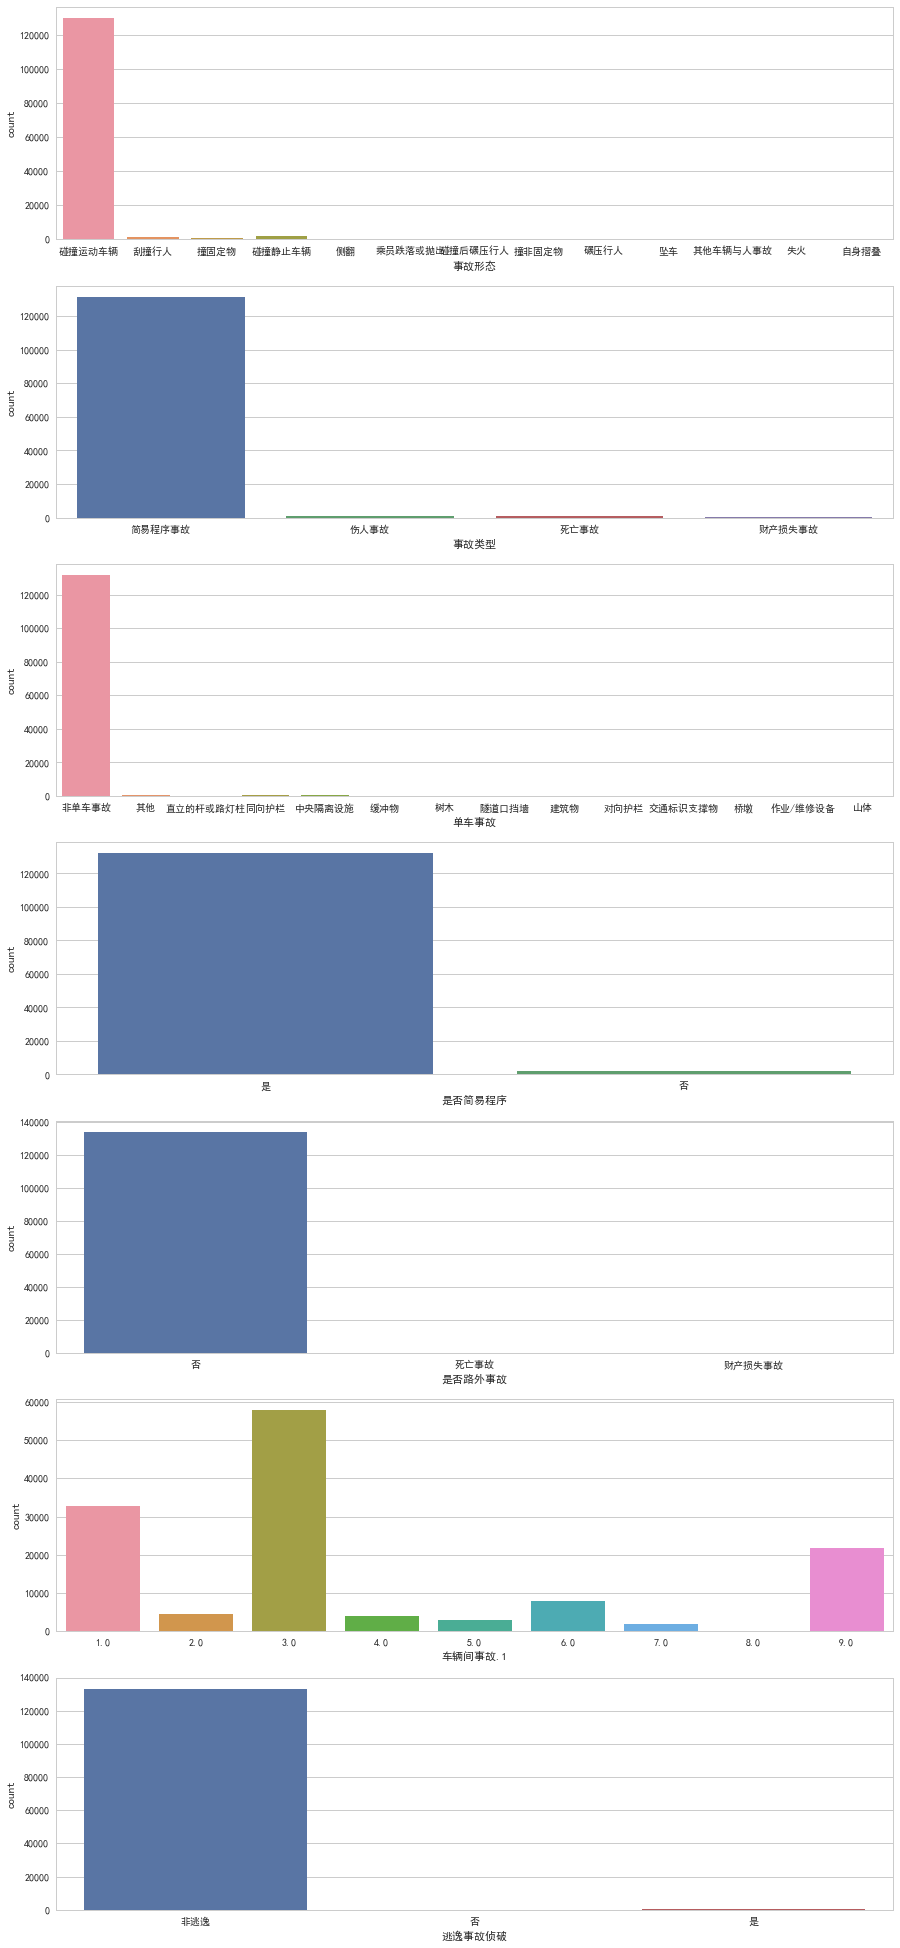

In [248]:
fig,axises = plt.subplots(7,1,figsize=(15,35))
x=0
for i in data_accidentType.columns:
    sns.countplot(data_accidentType[i],ax=axises[x])
    x += 1

In [249]:
pd.DataFrame.to_excel(data_accidentType,'data_accidentType_17.10.16.xlsx')

## 2.3 处理事故原因特征 

In [256]:
data_accident_afterType = data_accident_2[data_accident_2.事故形态.isin(['碰撞运动车辆','其他车辆事故',\
                                                '刮撞行人','撞固定物',\
                                                '撞非固定物','碾压行人',\
                                                '侧翻','碰撞静止车辆',\
                                                '碰撞后碾压行人','其他车辆与人事故',\
                                                '坠车','乘员跌落或抛出',\
                                                '翻滚','失火','自身摺叠'])]

data_accident_afterType['路外事故类型'].fillna('否',inplace=True)
data_accident_afterType.rename(columns={'路外事故类型':'是否路外事故'},inplace=True)
data_accident_afterType['逃逸事故侦破'].fillna('非逃逸',inplace=True)
data_accident_afterType['单车事故'].fillna('非单车事故',inplace=True)
data_accident_afterType.dropna(subset=['车辆间事故.1'],how='any',axis=0,inplace=True)

for i in data_accident_afterType.columns:
    print('%s：%s'%(i,sum(data_accident_afterType[i].isnull())/len(data_accident_afterType)))
print(len(data_accident_afterType))




D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


事故编号：0.0
所辖乡镇：4.48410385185e-05
现场：0.956003467707
行政区划：0.0
受伤人数：0.0
失踪人数：0.0
当事人总数：0.95610062329
抢救死亡人数Q：0.0
损坏机动车数：0.0
损坏非机动车数：0.0
机动车数量：0.95610062329
死亡人数：0.0
直接财产损失：0.0
米数：0.647123447379
轻伤人数：0.0
重伤人数：0.0
非机动车数量：0.95610062329
行人数量：0.95610062329
事故发生时间：0.0
星期：0.0
事故地点：0.0
路号：0.0
路名：8.22085706172e-05
事故形态：0.0
事故类型：0.0
单车事故：0.0
是否简易程序：0.0
是否路外事故：0.0
车辆间事故.1：0.0
逃逸事故侦破：0.0
事故初查原因：0.911962094375
事故初查原因分类：0.911984514895
事故认定原因：0.00057545999432
事故认定原因分类小类：0.00331076334395
133806


### 2.3.1 处理缺省值

#### 2.3.1.1  事故初查原因，事故初查原因分类

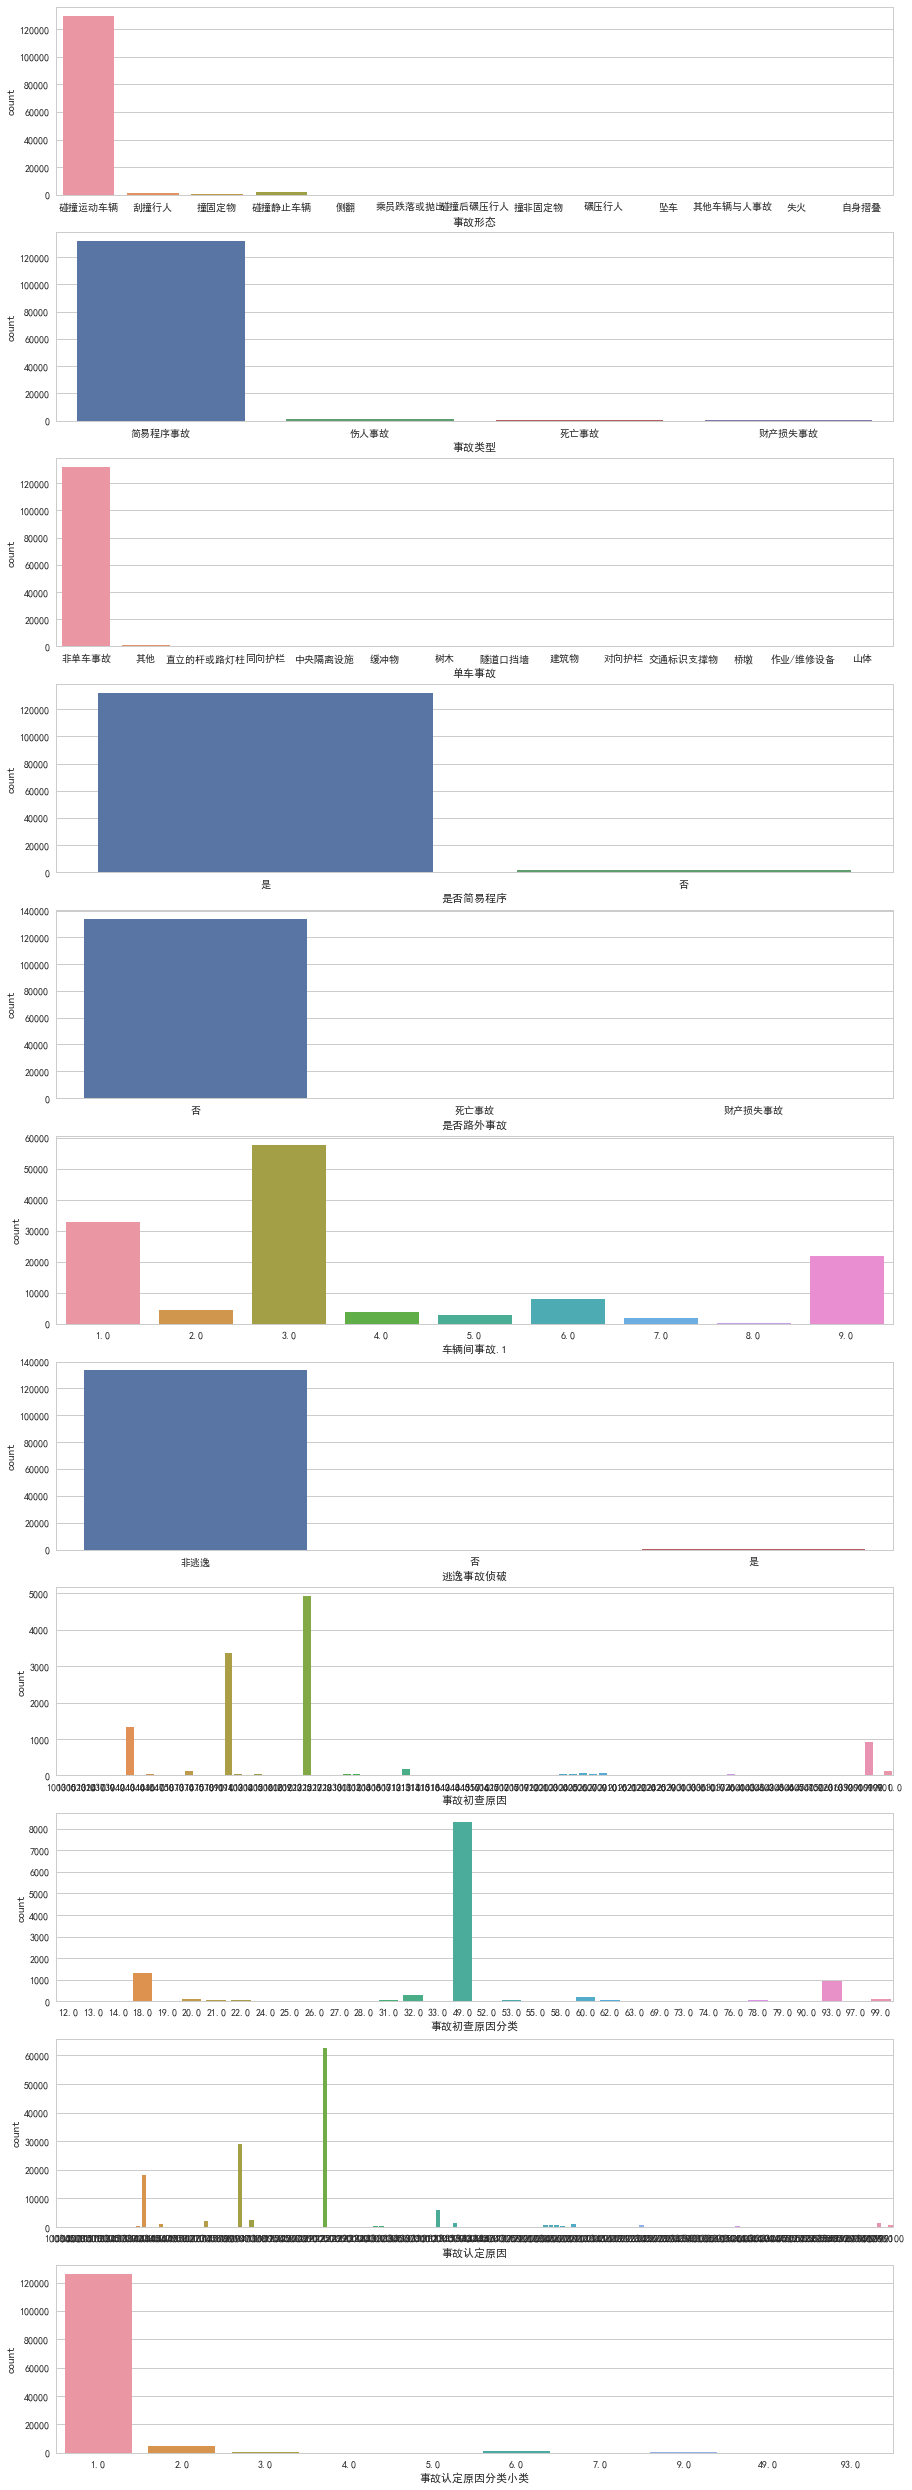

In [260]:
fig,axises = plt.subplots(11,1,figsize=(15,45))
x=0
for i in data_accident_afterType[['事故形态','事故类型','单车事故','是否简易程序','是否路外事故','车辆间事故.1','逃逸事故侦破',\
                            '事故初查原因','事故初查原因分类','事故认定原因','事故认定原因分类小类']].columns:
    sns.countplot(data_accident_afterType[i],ax=axises[x])
    x += 1

In [262]:
data_accidentReason = data_accident_afterType.dropna(subset=['事故初查原因','事故初查原因分类'],axis=0,how='any')
for i in data_accidentReason.columns:
    print('%s：%s'%(i,sum(data_accidentReason[i].isnull())/len(data_accidentReason)))
print(len(data_accidentReason))

事故编号：0.0
所辖乡镇：0.000509467606351
现场：0.801647278594
行政区划：0.0
受伤人数：0.0
失踪人数：0.0
当事人总数：0.802751125074
抢救死亡人数Q：0.0
损坏机动车数：0.0
损坏非机动车数：0.0
机动车数量：0.802751125074
死亡人数：0.0
直接财产损失：0.0
米数：0.533922051456
轻伤人数：0.0
重伤人数：0.0
非机动车数量：0.802751125074
行人数量：0.802751125074
事故发生时间：0.0
星期：0.0
事故地点：0.0
路号：0.0
路名：0.0
事故形态：0.0
事故类型：0.0
单车事故：0.0
是否简易程序：0.0
是否路外事故：0.0
车辆间事故.1：0.0
逃逸事故侦破：0.0
事故初查原因：0.0
事故初查原因分类：0.0
事故认定原因：0.00653816761484
事故认定原因分类小类：0.0376156916023
11777


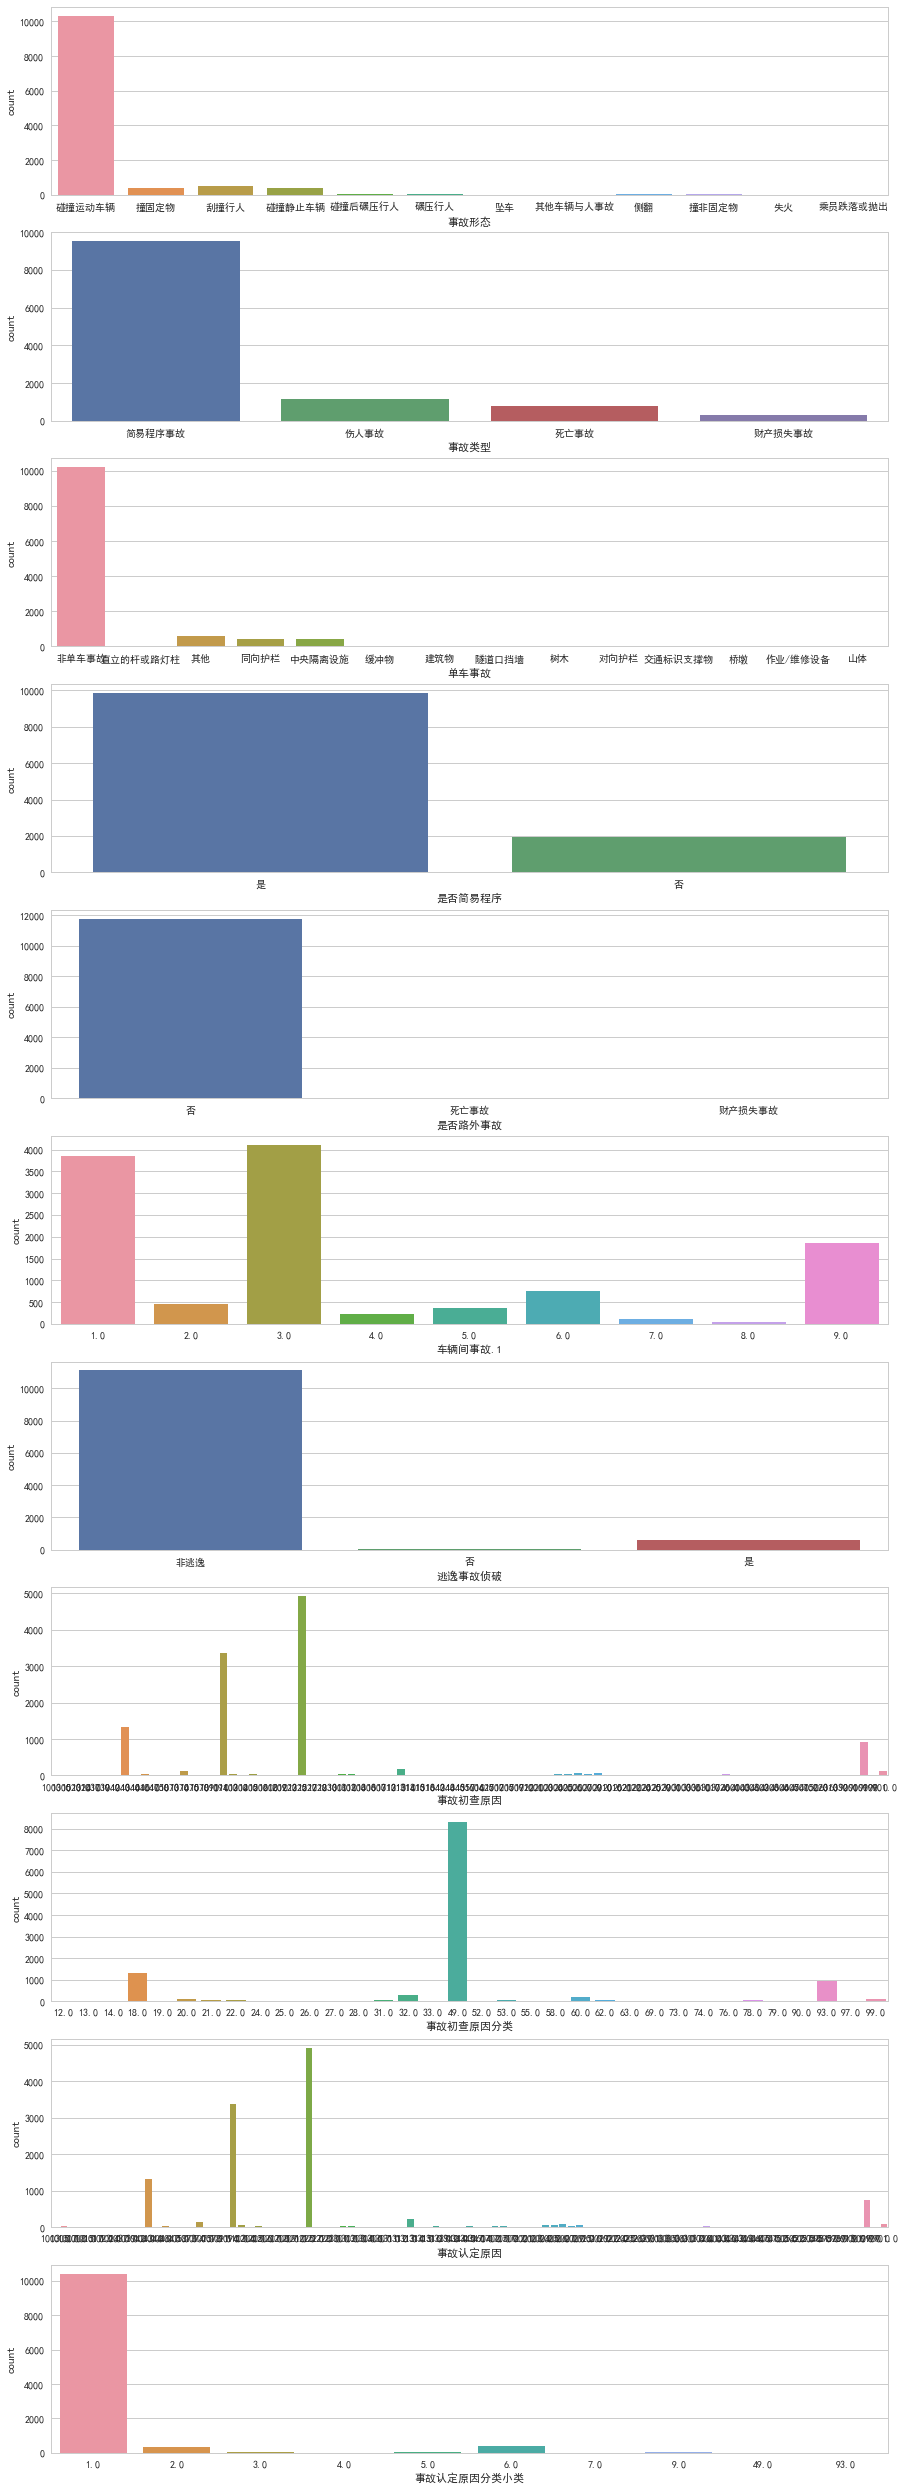

In [263]:
fig,axises = plt.subplots(11,1,figsize=(15,45))
x=0
for i in data_accidentReason[['事故形态','事故类型','单车事故','是否简易程序','是否路外事故','车辆间事故.1','逃逸事故侦破',\
                            '事故初查原因','事故初查原因分类','事故认定原因','事故认定原因分类小类']].columns:
    sns.countplot(data_accidentReason[i],ax=axises[x])
    x += 1

In [264]:
data_accident_afterType.drop(['事故初查原因','事故初查原因分类'],axis=1,inplace=True)

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [266]:
for i in data_accident_afterType.columns:
    print('%s:%s'%(i,sum(data_accident_afterType[i].isnull())/len(data_accident_afterType)))
print(len(data_accident_afterType))

事故编号:0.0
所辖乡镇:4.48410385185e-05
现场:0.956003467707
行政区划:0.0
受伤人数:0.0
失踪人数:0.0
当事人总数:0.95610062329
抢救死亡人数Q:0.0
损坏机动车数:0.0
损坏非机动车数:0.0
机动车数量:0.95610062329
死亡人数:0.0
直接财产损失:0.0
米数:0.647123447379
轻伤人数:0.0
重伤人数:0.0
非机动车数量:0.95610062329
行人数量:0.95610062329
事故发生时间:0.0
星期:0.0
事故地点:0.0
路号:0.0
路名:8.22085706172e-05
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.00057545999432
事故认定原因分类小类:0.00331076334395
133806


#### 2.3.1.2  事故认定原因，事故认定原因分类小类

In [269]:
data_accident_afterType.dropna(subset=['事故认定原因','事故认定原因分类小类'],axis=0,inplace=True)

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [270]:
for i in data_accident_afterType.columns:
    print('%s:%s'%(i,sum(data_accident_afterType[i].isnull())/len(data_accident_afterType)))
print(len(data_accident_afterType))

事故编号:0.0
所辖乡镇:3.74922203643e-05
现场:0.959193467356
行政区划:0.0
受伤人数:0.0
失踪人数:0.0
当事人总数:0.959223461132
抢救死亡人数Q:0.0
损坏机动车数:0.0
损坏非机动车数:0.0
机动车数量:0.959223461132
死亡人数:0.0
直接财产损失:0.0
米数:0.649282773824
轻伤人数:0.0
重伤人数:0.0
非机动车数量:0.959223461132
行人数量:0.959223461132
事故发生时间:0.0
星期:0.0
事故地点:0.0
路号:0.0
路名:8.24828848014e-05
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0
133361


In [271]:
pd.DataFrame.to_excel(data_accident_afterType,'data_accident_afterTypeAndReason_17.10.16.xlsx')

### 2.3.2 查看特征相关性

In [2]:
data_accident_afterType = pd.read_excel('data_accident_afterTypeAndReason_17.10.16.xlsx')

In [272]:
from sklearn import preprocessing

data_accident_afterTypeAndReason = data_accident_afterType[['事故形态','事故类型','单车事故','是否简易程序','是否路外事故',\
                                                            '车辆间事故.1','逃逸事故侦破','事故认定原因','事故认定原因分类小类']]


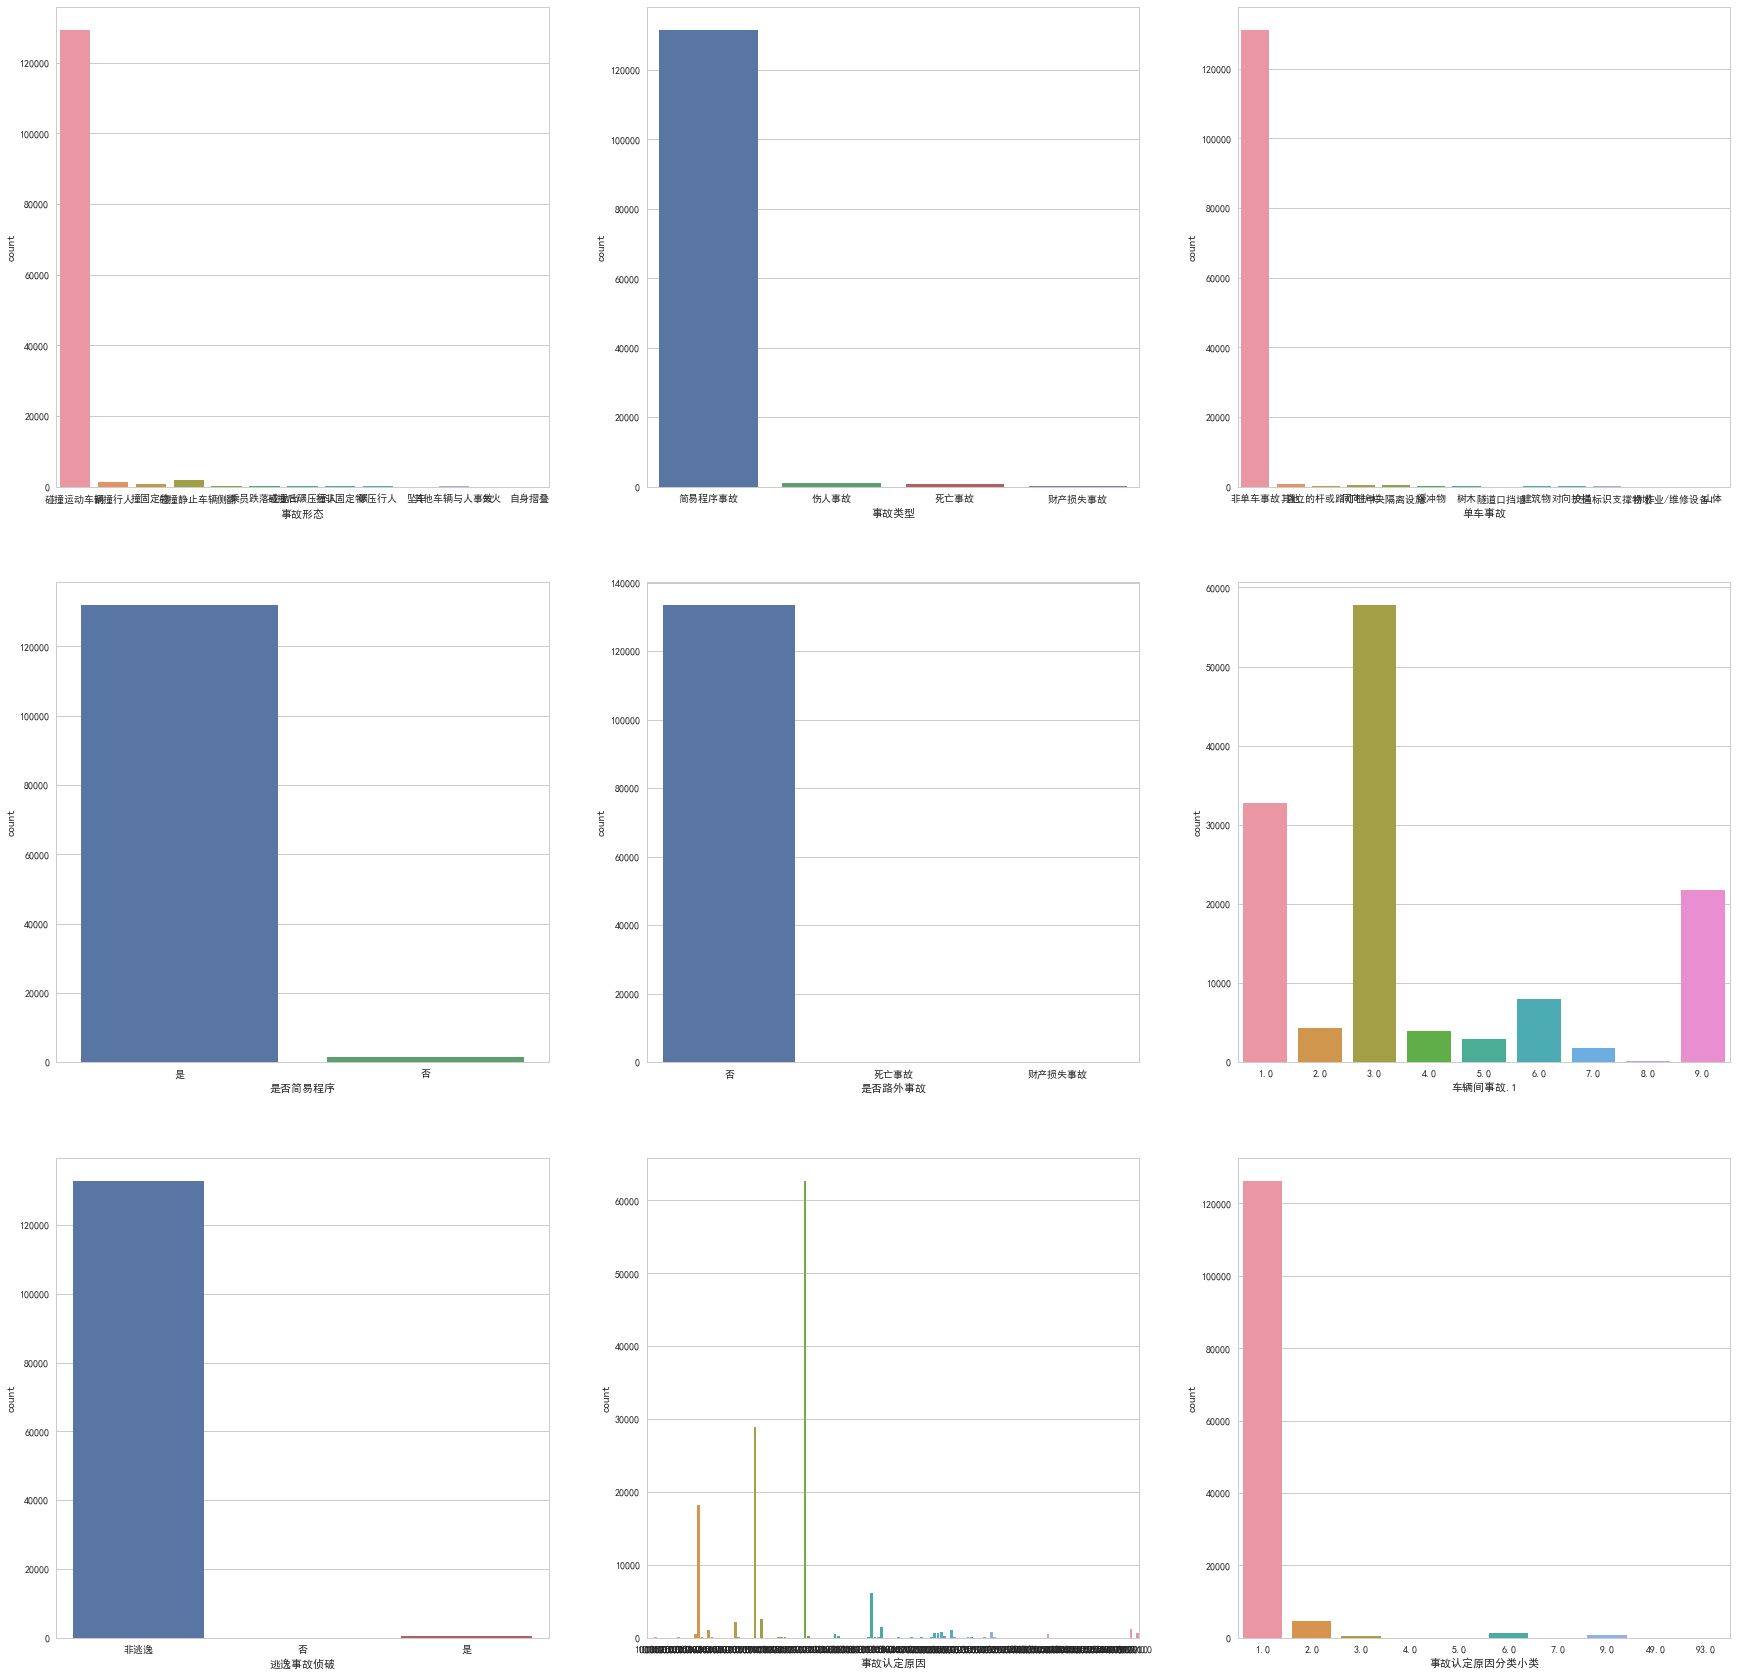

In [273]:
#before convert
fig,axes = plt.subplots(3,3,figsize=(30,30))
x=0
y=0
for i in data_accident_afterTypeAndReason.columns:
    sns.countplot(data_accident_afterTypeAndReason[i],ax=axes[x,y])
    y += 1
    if y==3:
        y=0
        x += 1

In [274]:
columnsToNum = list(data_accident_afterTypeAndReason.columns)
columnsToNum.remove('车辆间事故.1')


data_accident_afterTypeAndReason_toNum = pd.DataFrame()
for i in columnsToNum:
    data_accident_afterTypeAndReason_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_accident_afterTypeAndReason[i])
# 转换为list插入才会非空
data_accident_afterTypeAndReason_toNum.insert(value=list(data_accident_afterTypeAndReason['车辆间事故.1']),loc=5,\
                                                    column='车辆间事故.1')

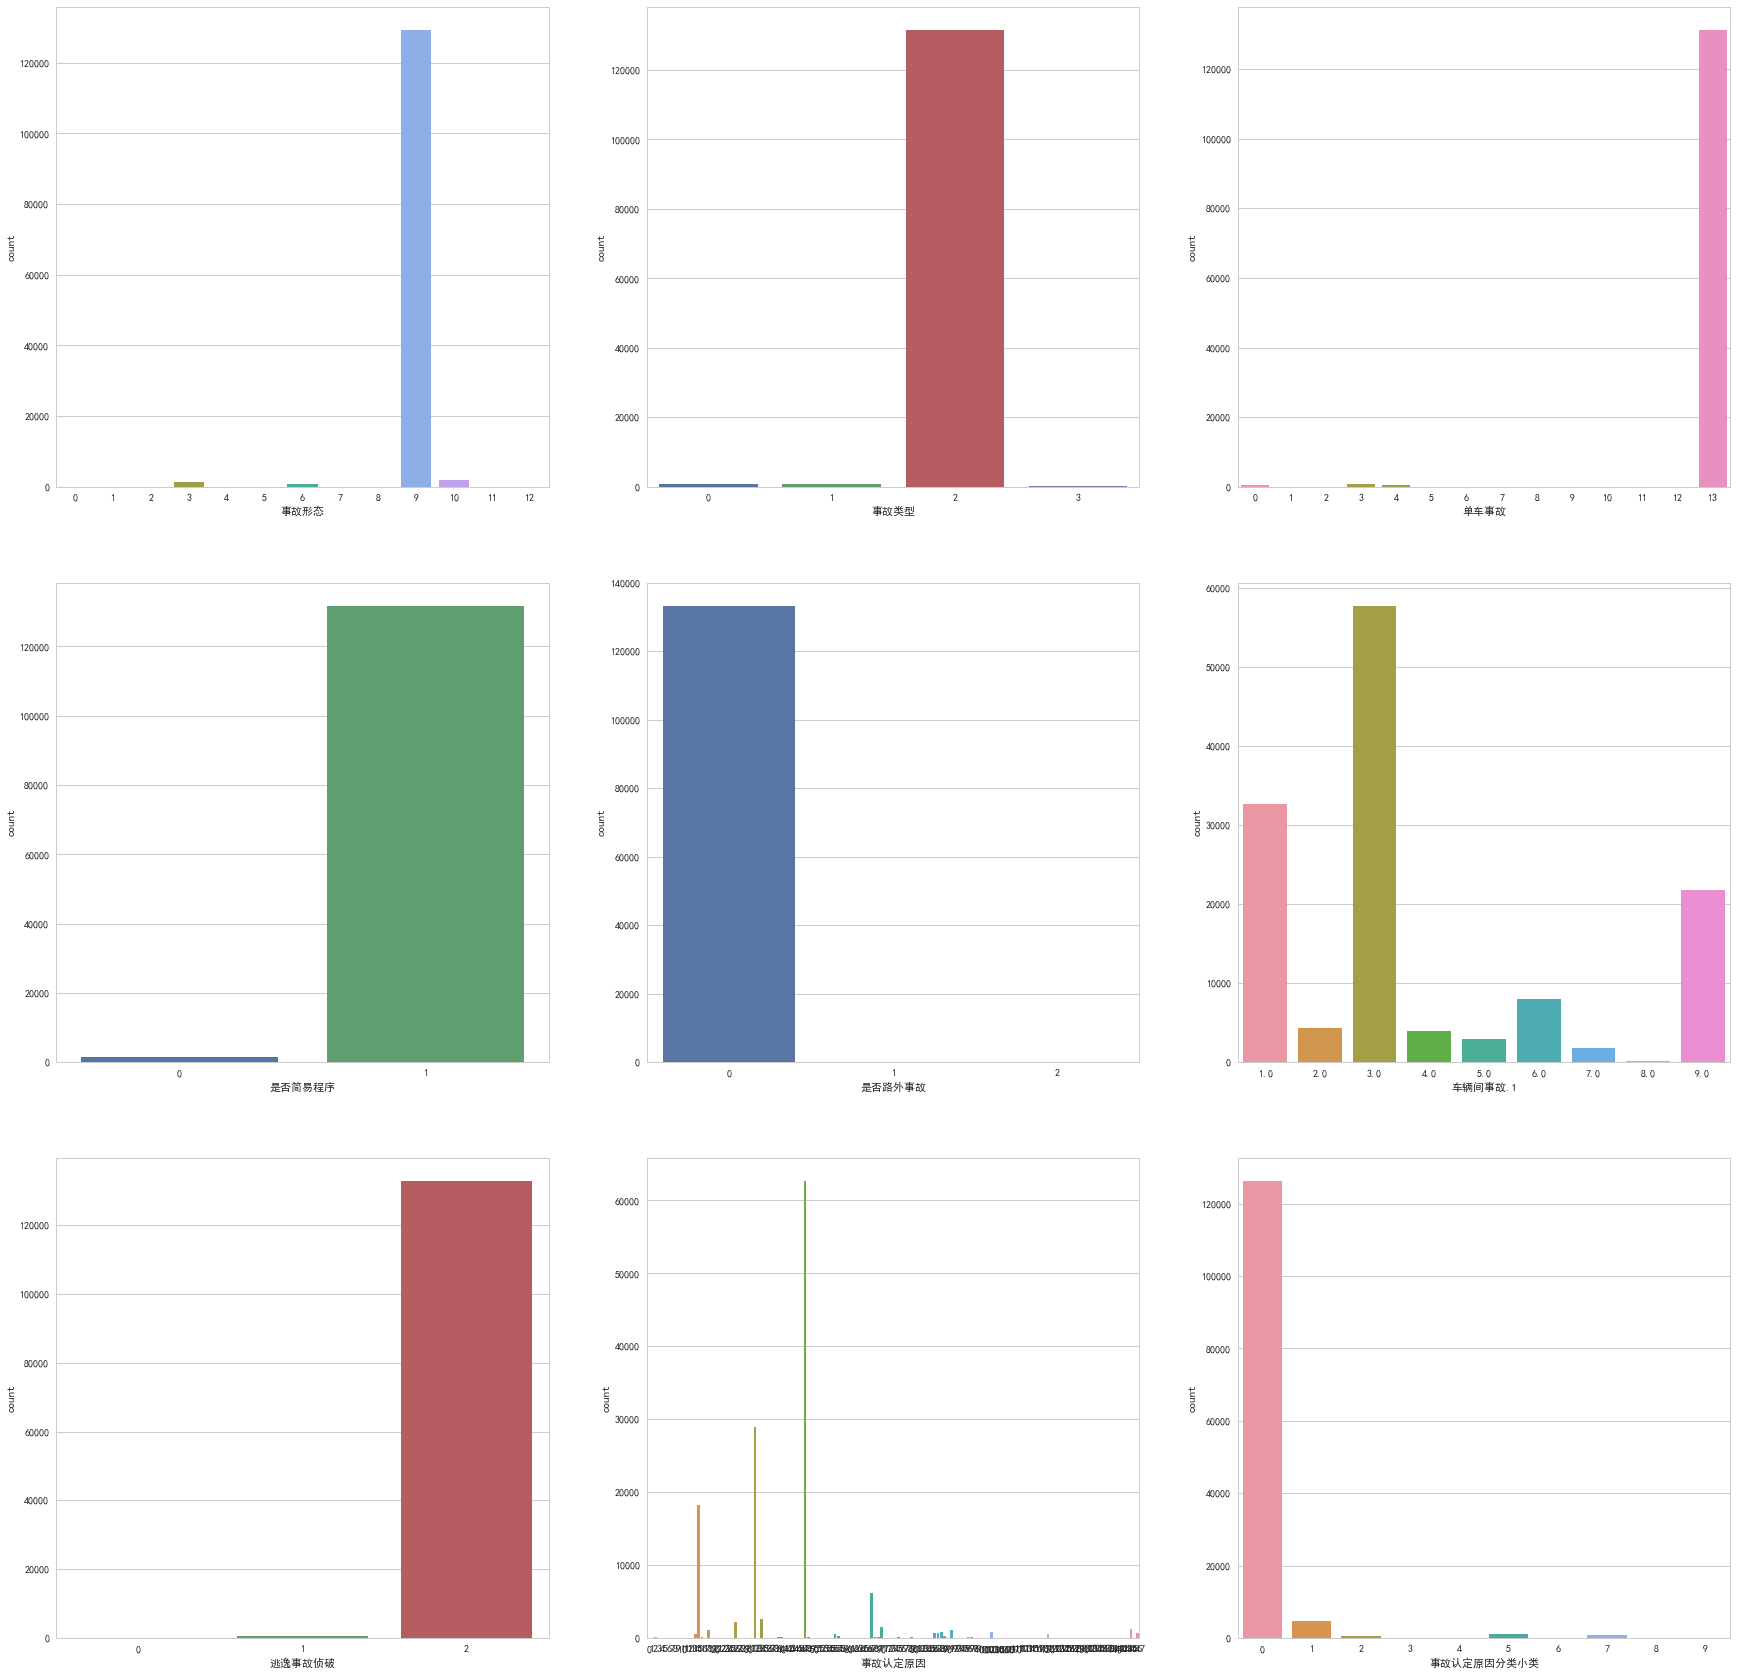

In [275]:
#after convert
fig,axes = plt.subplots(3,3,figsize=(30,30))
x=0
y=0
for i in data_accident_afterTypeAndReason_toNum.columns:
    sns.countplot(data_accident_afterTypeAndReason_toNum[i],ax=axes[x,y])
    y += 1
    if y==3:
        y=0
        x += 1

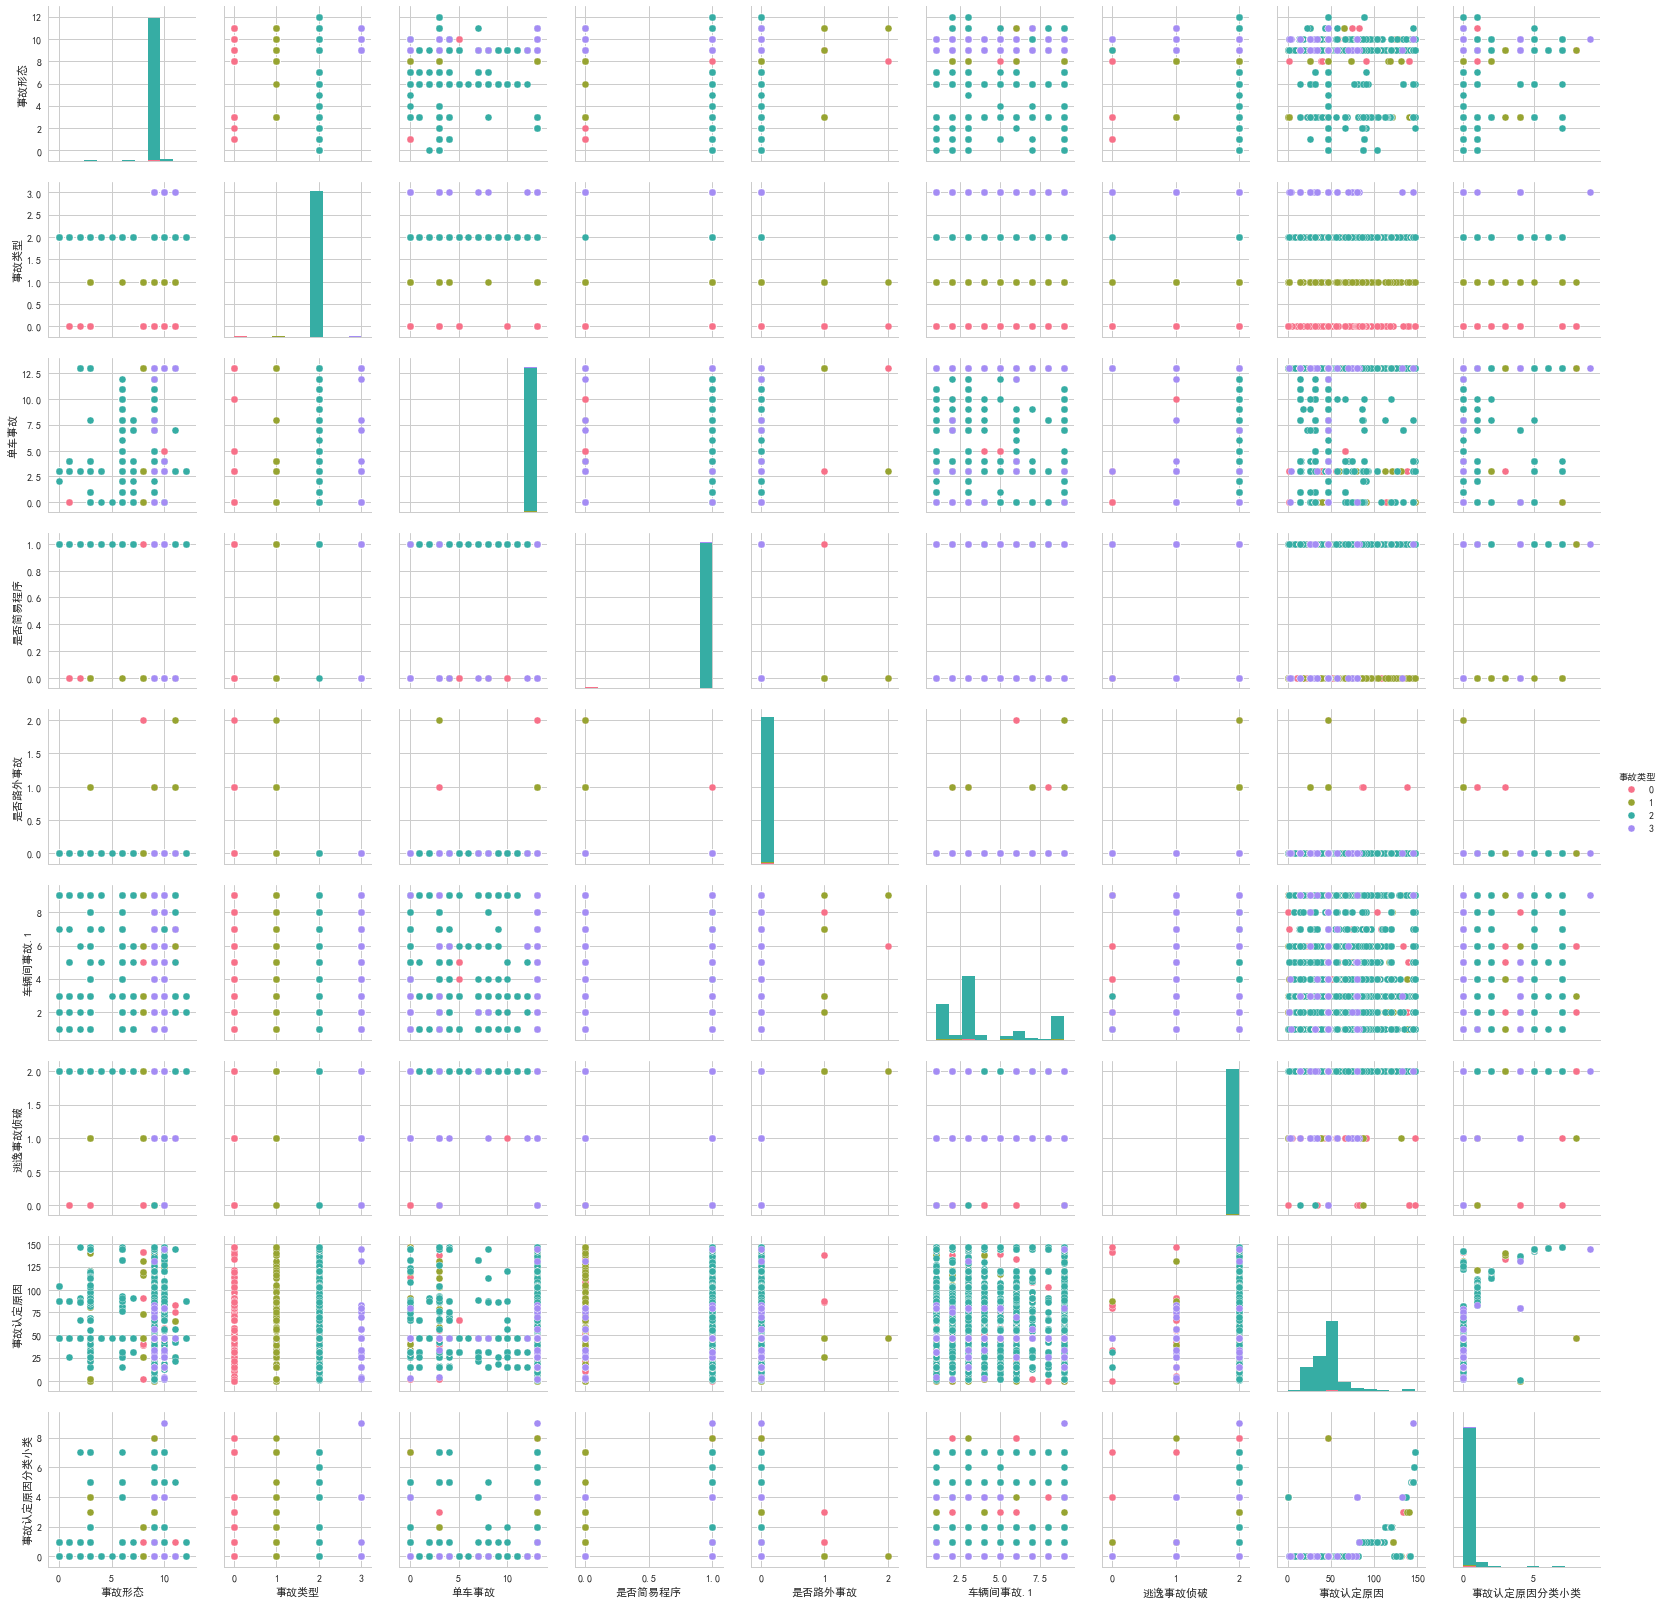

In [278]:
# sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
sns.pairplot(data_accident_afterTypeAndReason_toNum,hue='事故类型',palette="husl")

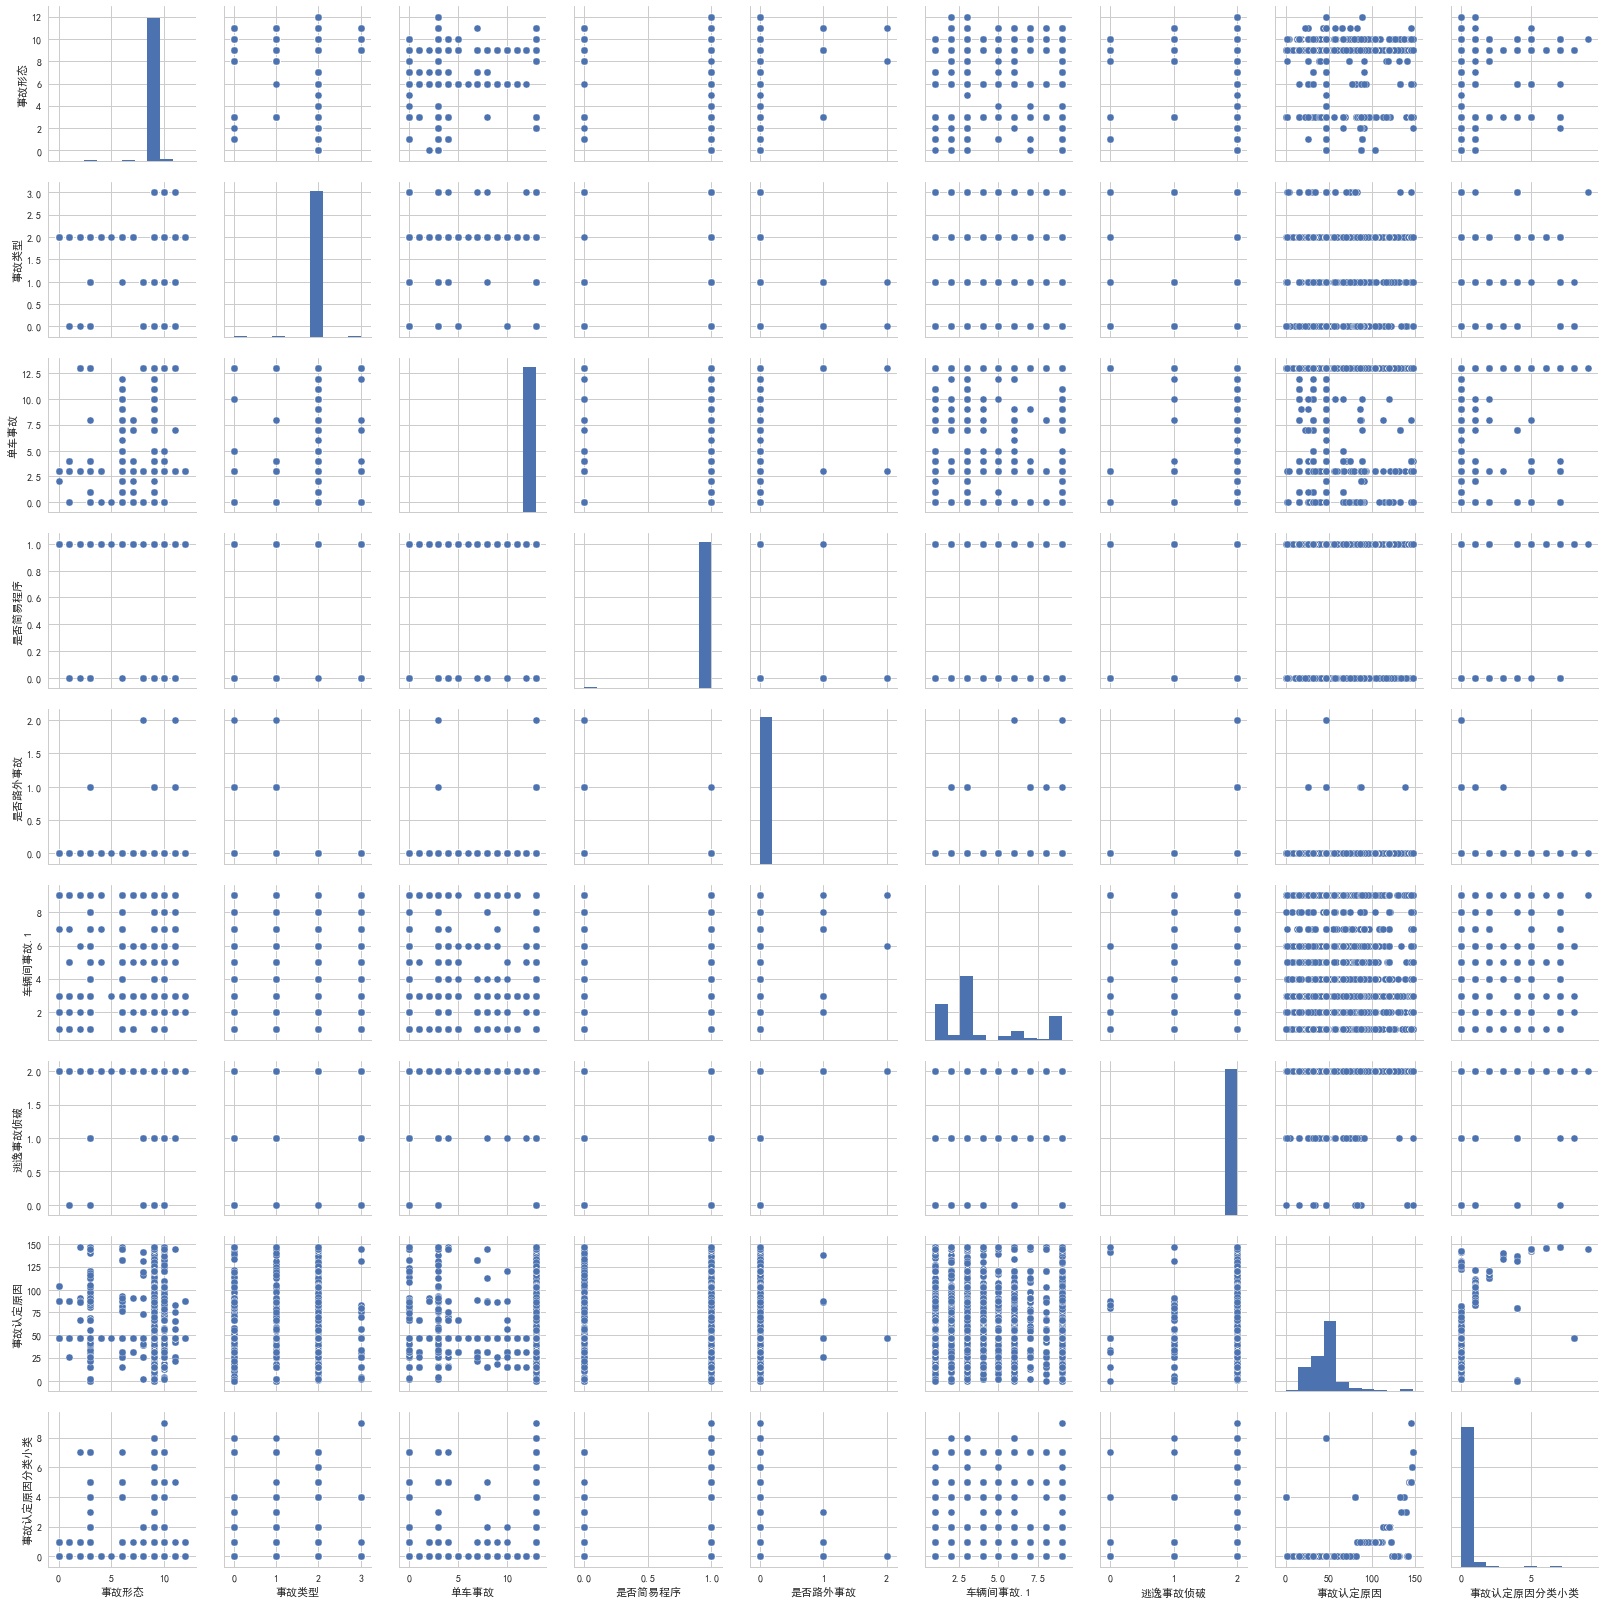

In [279]:
# sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
sns.pairplot(data_accident_afterTypeAndReason_toNum,palette="husl")

## 2.4 处理事故严重性特征 

In [2]:
data_accident_afterType = pd.read_excel('data_accident_afterTypeAndReason_17.10.16.xlsx')

In [3]:
for i in data_accident_afterType.columns:
    print('%s:%s'%(i,sum(data_accident_afterType[i].isnull())/len(data_accident_afterType)))
print(len(data_accident_afterType))

事故编号:0.0
所辖乡镇:3.74922203643e-05
现场:0.959193467356
行政区划:0.0
受伤人数:0.0
失踪人数:0.0
当事人总数:0.959223461132
抢救死亡人数Q:0.0
损坏机动车数:0.0
损坏非机动车数:0.0
机动车数量:0.959223461132
死亡人数:0.0
直接财产损失:0.0
米数:0.649282773824
轻伤人数:0.0
重伤人数:0.0
非机动车数量:0.959223461132
行人数量:0.959223461132
事故发生时间:0.0
星期:0.0
事故地点:0.0
路号:0.0
路名:8.24828848014e-05
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0
133361


In [29]:
data_serverity = data_accident_afterType[['受伤人数','失踪人数','当事人总数','抢救死亡人数Q','损坏机动车数','损坏非机动车数',\
                                          '机动车数量','死亡人数','直接财产损失','米数','轻伤人数','重伤人数','非机动车数量',\
                                          '行人数量','事故形态','事故类型','单车事故','是否简易程序','是否路外事故','车辆间事故.1',\
                                          '逃逸事故侦破','事故认定原因','事故认定原因分类小类']]

In [5]:
for i in data_serverity.columns:
    print('%s:%s'%(i,sum(data_serverity[i].isnull())/len(data_serverity)))
print(len(data_serverity))

受伤人数:0.0
失踪人数:0.0
当事人总数:0.959223461132
抢救死亡人数Q:0.0
损坏机动车数:0.0
损坏非机动车数:0.0
机动车数量:0.959223461132
死亡人数:0.0
直接财产损失:0.0
米数:0.649282773824
轻伤人数:0.0
重伤人数:0.0
非机动车数量:0.959223461132
行人数量:0.959223461132
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0
133361


### 2.4.1 当事人总数、机动车数量、非机动车数量、行人数量

#### 由于 当事人总数、机动车数量、非机动车数量、行人数量 缺失率相同，缺失数据很可能分布于相同数据集

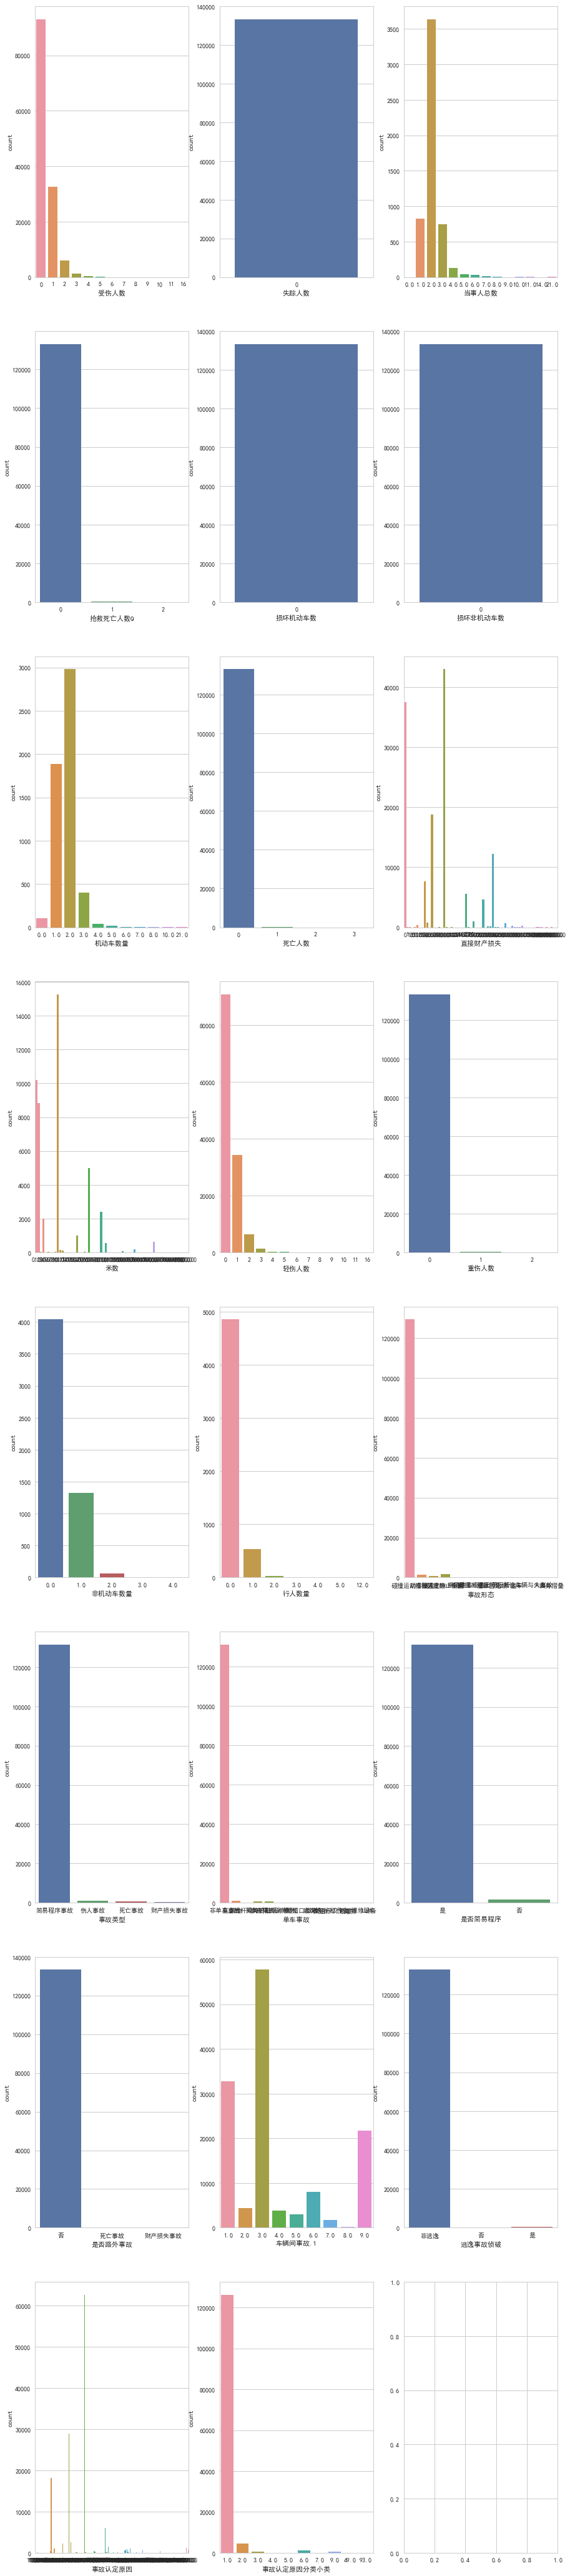

In [285]:
fig,axes = plt.subplots(8,3,figsize=(15,75))
x=0
y=0
for i in data_serverity.columns:
    sns.countplot(data_serverity[i],ax=axes[x,y])
    y += 1
    if y==3:
        y = 0
        x += 1

#### 删除无用特征（特征值为同一值） 

In [30]:
data_serverity.drop(['失踪人数','损坏机动车数','损坏非机动车数'],axis=1,inplace=True)

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
for i in data_serverity.columns:
    print('%s:%s'%(i,sum(data_serverity[i].isnull())/len(data_serverity)))
print(len(data_serverity))

受伤人数:0.0
当事人总数:0.959223461132
抢救死亡人数Q:0.0
机动车数量:0.959223461132
死亡人数:0.0
直接财产损失:0.0
米数:0.649282773824
轻伤人数:0.0
重伤人数:0.0
非机动车数量:0.959223461132
行人数量:0.959223461132
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0
133361


In [32]:
blank_fea = data_serverity[['当事人总数','机动车数量','非机动车数量','行人数量','米数']]
data_serverity.drop(['当事人总数','机动车数量','非机动车数量','行人数量','米数'],axis=1,inplace=True)
print(data_serverity.columns)
data_serverity = pd.concat([blank_fea,data_serverity],join='inner',axis=1)
del blank_fea
print(data_serverity.columns)

Index(['受伤人数', '抢救死亡人数Q', '死亡人数', '直接财产损失', '轻伤人数', '重伤人数', '事故形态', '事故类型',
       '单车事故', '是否简易程序', '是否路外事故', '车辆间事故.1', '逃逸事故侦破', '事故认定原因',
       '事故认定原因分类小类'],
      dtype='object')
Index(['当事人总数', '机动车数量', '非机动车数量', '行人数量', '米数', '受伤人数', '抢救死亡人数Q', '死亡人数',
       '直接财产损失', '轻伤人数', '重伤人数', '事故形态', '事故类型', '单车事故', '是否简易程序', '是否路外事故',
       '车辆间事故.1', '逃逸事故侦破', '事故认定原因', '事故认定原因分类小类'],
      dtype='object')


D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [33]:
for i in data_serverity.columns:
    print('%s:%s'%(i,sum(data_serverity[i].isnull())/len(data_serverity)))
print(len(data_serverity))

当事人总数:0.959223461132
机动车数量:0.959223461132
非机动车数量:0.959223461132
行人数量:0.959223461132
米数:0.649282773824
受伤人数:0.0
抢救死亡人数Q:0.0
死亡人数:0.0
直接财产损失:0.0
轻伤人数:0.0
重伤人数:0.0
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0
133361


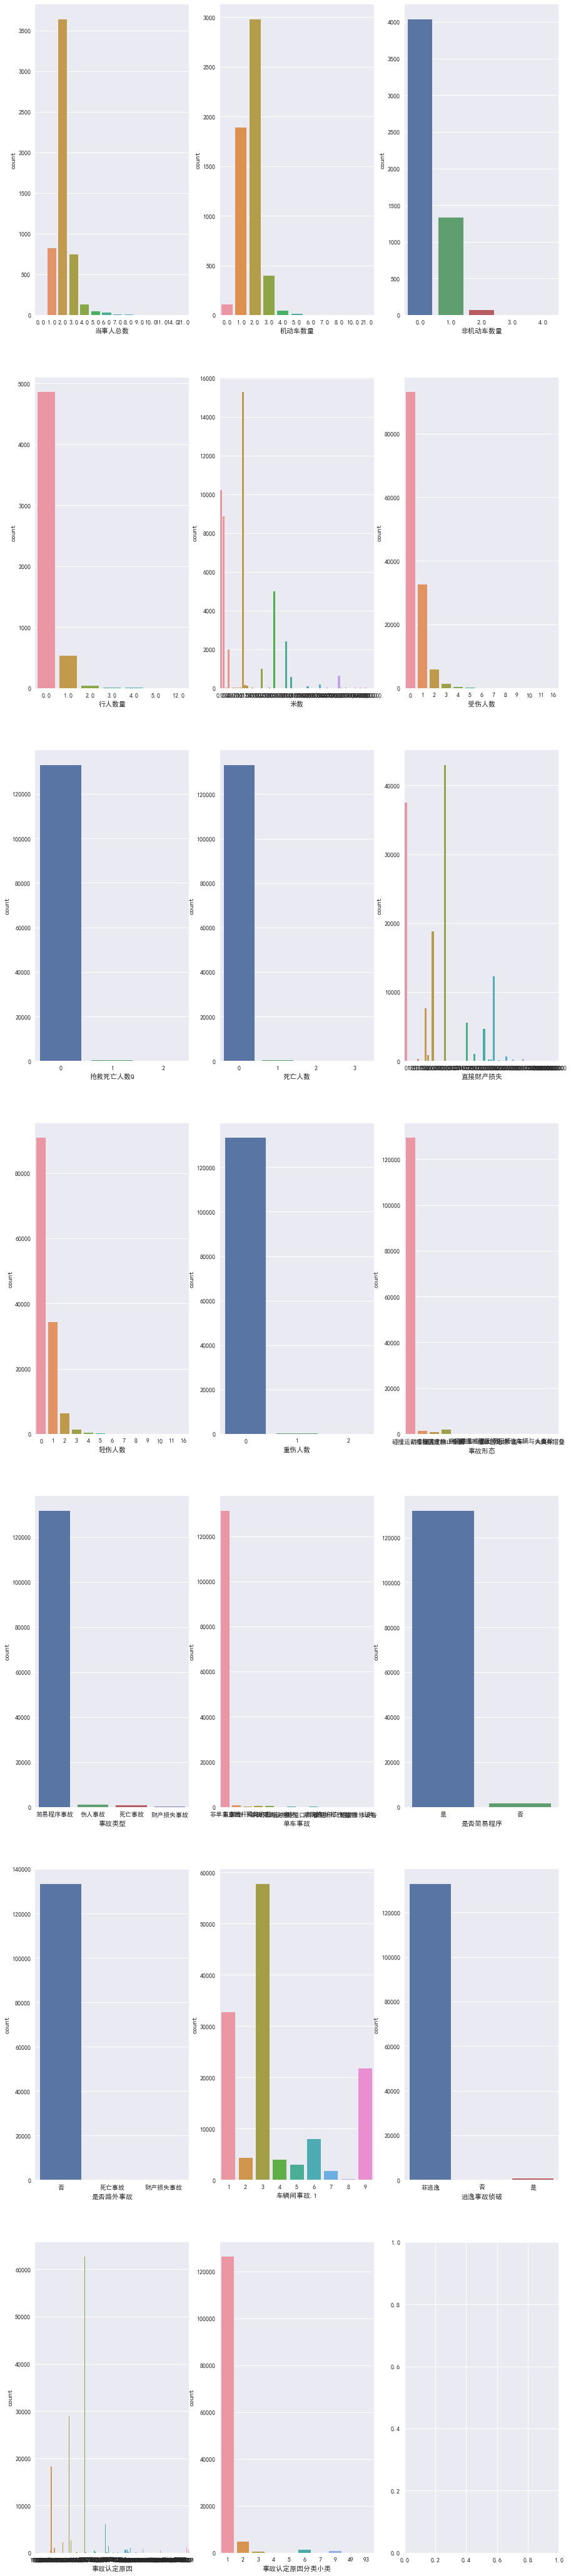

In [34]:
fig,axes = plt.subplots(7,3,figsize=(15,75))
x=0
y=0
for i in data_serverity.columns:
    sns.countplot(data_serverity[i],ax=axes[x,y])
    y += 1
    if y==3:
        y = 0
        x += 1

In [35]:
data_serverity_noNan = data_serverity.dropna(subset=['当事人总数'],axis=0,how='any')
for i in data_serverity_noNan.columns:
    print('%s:%s'%(i,sum(data_serverity_noNan[i].isnull())/len(data_serverity_noNan)))
print(len(data_serverity_noNan))

当事人总数:0.0
机动车数量:0.0
非机动车数量:0.0
行人数量:0.0
米数:0.000551673409342
受伤人数:0.0
抢救死亡人数Q:0.0
死亡人数:0.0
直接财产损失:0.0
轻伤人数:0.0
重伤人数:0.0
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0
5438


In [41]:
print(data_serverity.columns)

Index(['当事人总数', '机动车数量', '非机动车数量', '行人数量', '米数', '受伤人数', '抢救死亡人数Q', '死亡人数',
       '直接财产损失', '轻伤人数', '重伤人数', '事故形态', '事故类型', '单车事故', '是否简易程序', '是否路外事故',
       '车辆间事故.1', '逃逸事故侦破', '事故认定原因', '事故认定原因分类小类'],
      dtype='object')


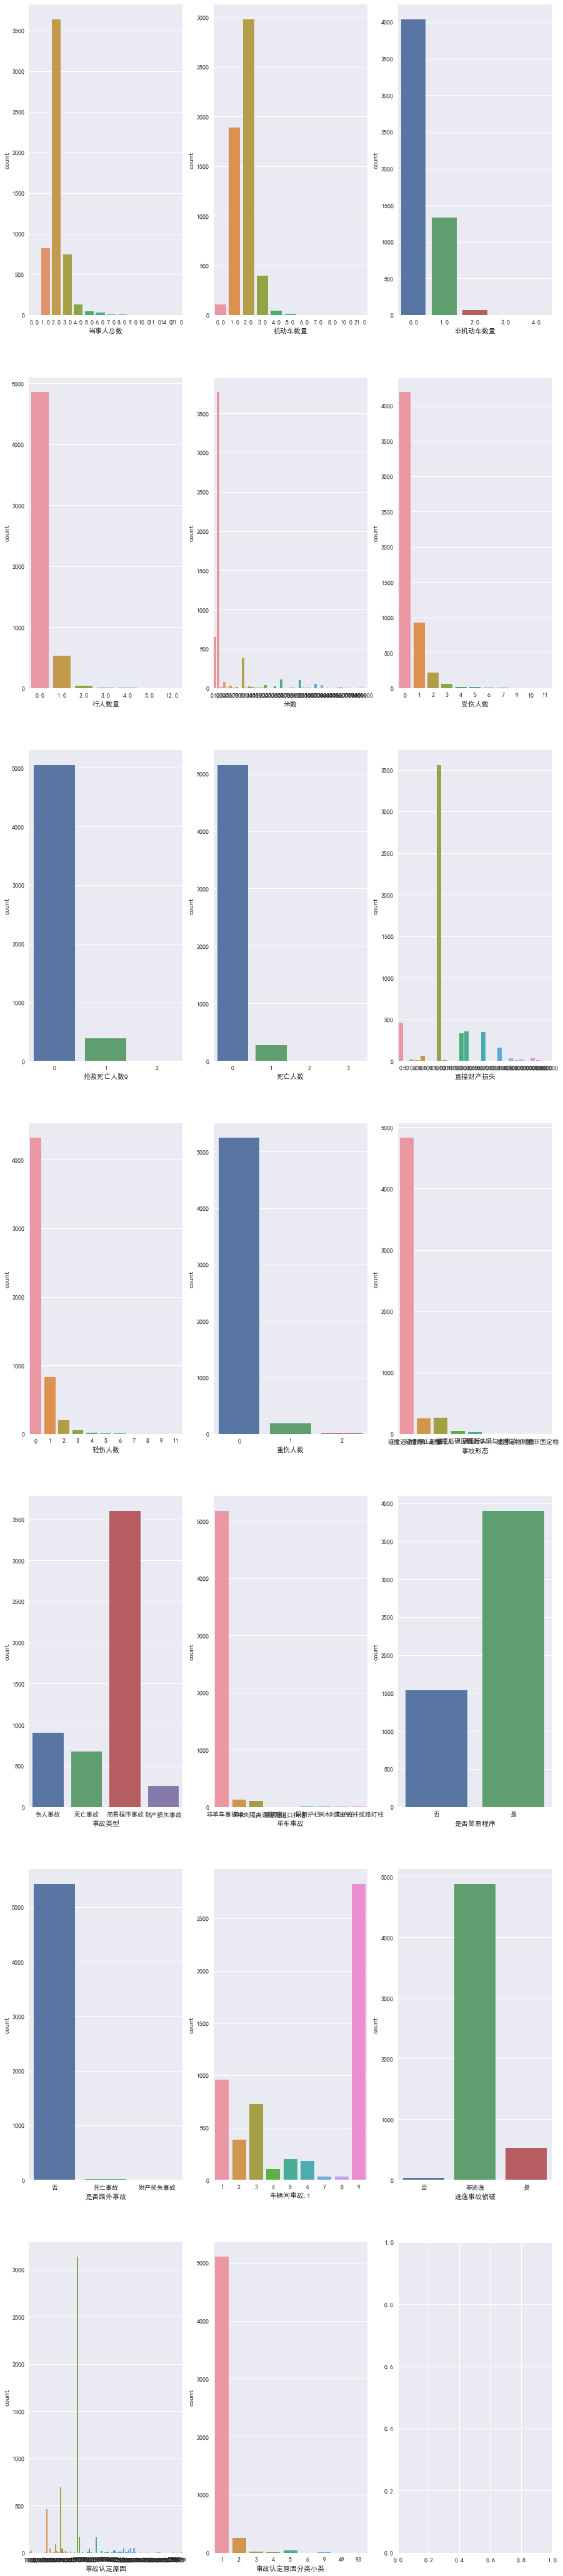

In [36]:
fig,axes = plt.subplots(7,3,figsize=(15,75))
x=0
y=0
for i in data_serverity_noNan.columns:
    sns.countplot(data_serverity_noNan[i],ax=axes[x,y])
    y += 1
    if y==3:
        y = 0
        x += 1

#### 填充缺省值 

In [3]:
#-1表示未知
data_accident_afterType['当事人总数'].fillna(-1,inplace=True)
data_accident_afterType['机动车数量'].fillna(-1,inplace=True)
data_accident_afterType['非机动车数量'].fillna(-1,inplace=True)
data_accident_afterType['行人数量'].fillna(-1,inplace=True)
for i in data_accident_afterType.columns:
    print('%s:%s'%(i,sum(data_accident_afterType[i].isnull())/len(data_accident_afterType)))
print(len(data_accident_afterType))

事故编号:0.0
所辖乡镇:3.74922203643e-05
现场:0.959193467356
行政区划:0.0
受伤人数:0.0
失踪人数:0.0
当事人总数:0.0
抢救死亡人数Q:0.0
损坏机动车数:0.0
损坏非机动车数:0.0
机动车数量:0.0
死亡人数:0.0
直接财产损失:0.0
米数:0.649282773824
轻伤人数:0.0
重伤人数:0.0
非机动车数量:0.0
行人数量:0.0
事故发生时间:0.0
星期:0.0
事故地点:0.0
路号:0.0
路名:8.24828848014e-05
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0
133361


### 2.4.2米数

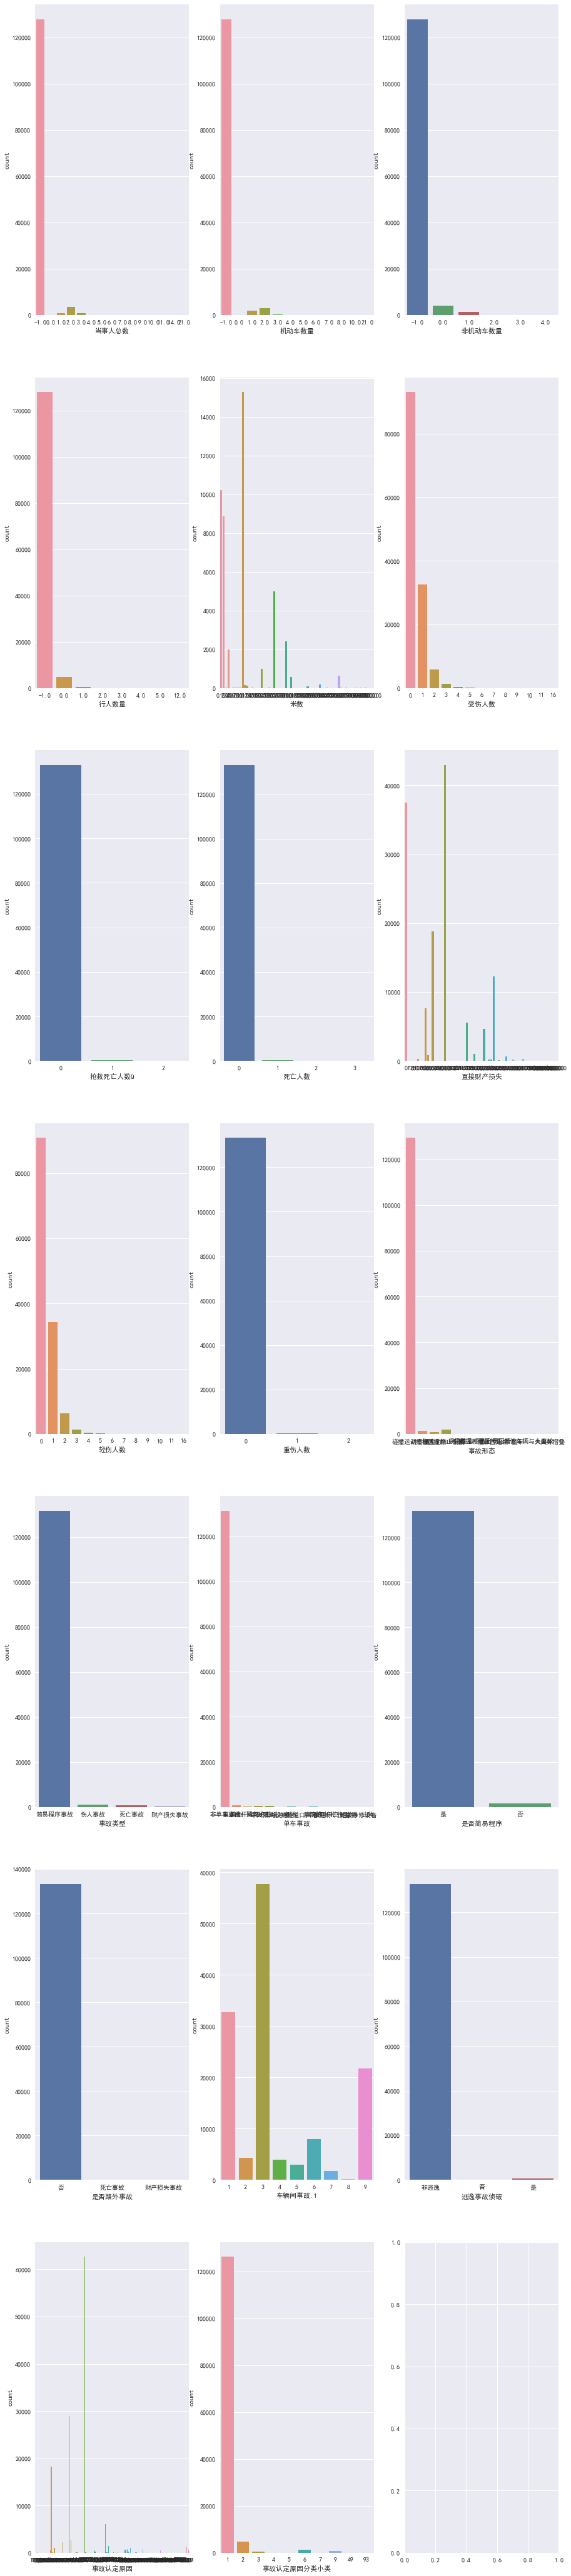

In [42]:
fig,axes = plt.subplots(7,3,figsize=(15,75))
x=0
y=0
cols = ['当事人总数', '机动车数量', '非机动车数量', '行人数量', '米数', '受伤人数', '抢救死亡人数Q', '死亡人数',\
       '直接财产损失', '轻伤人数', '重伤人数', '事故形态', '事故类型', '单车事故', '是否简易程序', '是否路外事故',\
       '车辆间事故.1', '逃逸事故侦破', '事故认定原因', '事故认定原因分类小类']
for i in cols:
    sns.countplot(data_accident_afterType[i],ax=axes[x,y])
    y += 1
    if y==3:
        y = 0
        x += 1

In [43]:
data_meter = data_accident_afterType[['当事人总数', '机动车数量', '非机动车数量', '行人数量', '米数', '受伤人数', '抢救死亡人数Q', '死亡人数',\
       '直接财产损失', '轻伤人数', '重伤人数', '事故形态', '事故类型', '单车事故', '是否简易程序', '是否路外事故',\
       '车辆间事故.1', '逃逸事故侦破', '事故认定原因', '事故认定原因分类小类']].dropna(subset=['米数'],axis=0,how='any')
for i in data_meter.columns:
    print('%s:%s'%(i,sum(data_meter[i].isnull())/len(data_meter)))
print(len(data_meter))

当事人总数:0.0
机动车数量:0.0
非机动车数量:0.0
行人数量:0.0
米数:0.0
受伤人数:0.0
抢救死亡人数Q:0.0
死亡人数:0.0
直接财产损失:0.0
轻伤人数:0.0
重伤人数:0.0
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0
46772


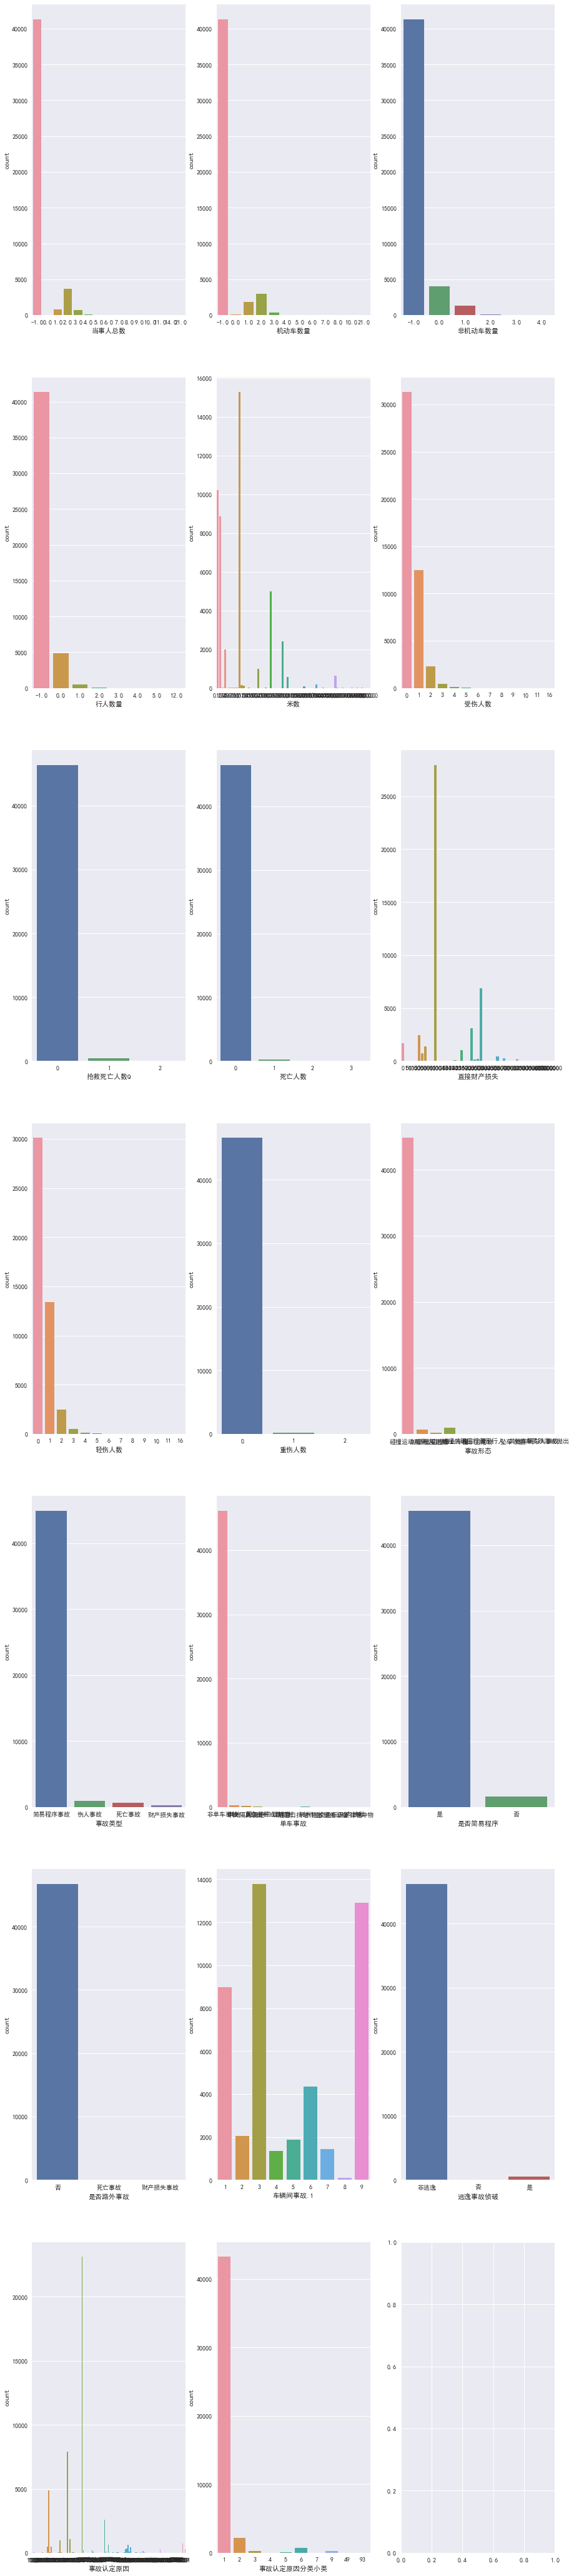

In [47]:
fig,axes = plt.subplots(7,3,figsize=(15,75))
x=0
y=0
for i in data_meter.columns:
    sns.countplot(data_meter[i],ax=axes[x,y])
    y += 1
    if y==3:
        y = 0
        x += 1

#### 填充米数 

In [4]:
data_accident_afterType['米数'].fillna(-1,inplace=True)
data_accident_afterType.drop(['失踪人数','损坏机动车数','损坏非机动车数'],axis=1,inplace=True)
for i in data_accident_afterType.columns:
    print('%s:%s'%(i,sum(data_accident_afterType[i].isnull())/len(data_accident_afterType)))
print(len(data_accident_afterType))

事故编号:0.0
所辖乡镇:3.74922203643e-05
现场:0.959193467356
行政区划:0.0
受伤人数:0.0
当事人总数:0.0
抢救死亡人数Q:0.0
机动车数量:0.0
死亡人数:0.0
直接财产损失:0.0
米数:0.0
轻伤人数:0.0
重伤人数:0.0
非机动车数量:0.0
行人数量:0.0
事故发生时间:0.0
星期:0.0
事故地点:0.0
路号:0.0
路名:8.24828848014e-05
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0
133361


## 2.5 事故基本信息和时空信息 

In [5]:
data_acciInfo = data_accident_afterType[['事故编号', '所辖乡镇', '现场','行政区划', '事故发生时间', '星期', '事故地点', '路号', '路名']]
data_accident_afterType.drop(['事故编号', '所辖乡镇', '现场','行政区划', '事故发生时间', '星期', '事故地点', '路号', '路名'],\
                             axis=1,inplace=True)
data_accident_afterType = pd.concat([data_acciInfo,data_accident_afterType],join='inner',axis=1)
del data_acciInfo

In [6]:
data_accident_afterType.columns

Index(['事故编号', '所辖乡镇', '现场', '行政区划', '事故发生时间', '星期', '事故地点', '路号', '路名',
       '受伤人数', '当事人总数', '抢救死亡人数Q', '机动车数量', '死亡人数', '直接财产损失', '米数', '轻伤人数',
       '重伤人数', '非机动车数量', '行人数量', '事故形态', '事故类型', '单车事故', '是否简易程序', '是否路外事故',
       '车辆间事故.1', '逃逸事故侦破', '事故认定原因', '事故认定原因分类小类'],
      dtype='object')

In [54]:
for i in data_accident_afterType.columns:
    print('%s:%s'%(i,sum(data_accident_afterType[i].isnull())/len(data_accident_afterType)))
print(len(data_accident_afterType))

事故编号:0.0
所辖乡镇:3.74922203643e-05
现场:0.959193467356
行政区划:0.0
事故发生时间:0.0
星期:0.0
事故地点:0.0
路号:0.0
路名:8.24828848014e-05
受伤人数:0.0
当事人总数:0.0
抢救死亡人数Q:0.0
机动车数量:0.0
死亡人数:0.0
直接财产损失:0.0
米数:0.0
轻伤人数:0.0
重伤人数:0.0
非机动车数量:0.0
行人数量:0.0
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0
133361


In [7]:
pd.DataFrame.to_excel(data_accident_afterType,'data_accident_afterSerivity_17.10.17.xlsx')

### 2.5.1 现场 

In [8]:
data_accident_withoutNo = data_accident_afterType.drop(['事故编号'],axis=1)
del data_accident_afterType

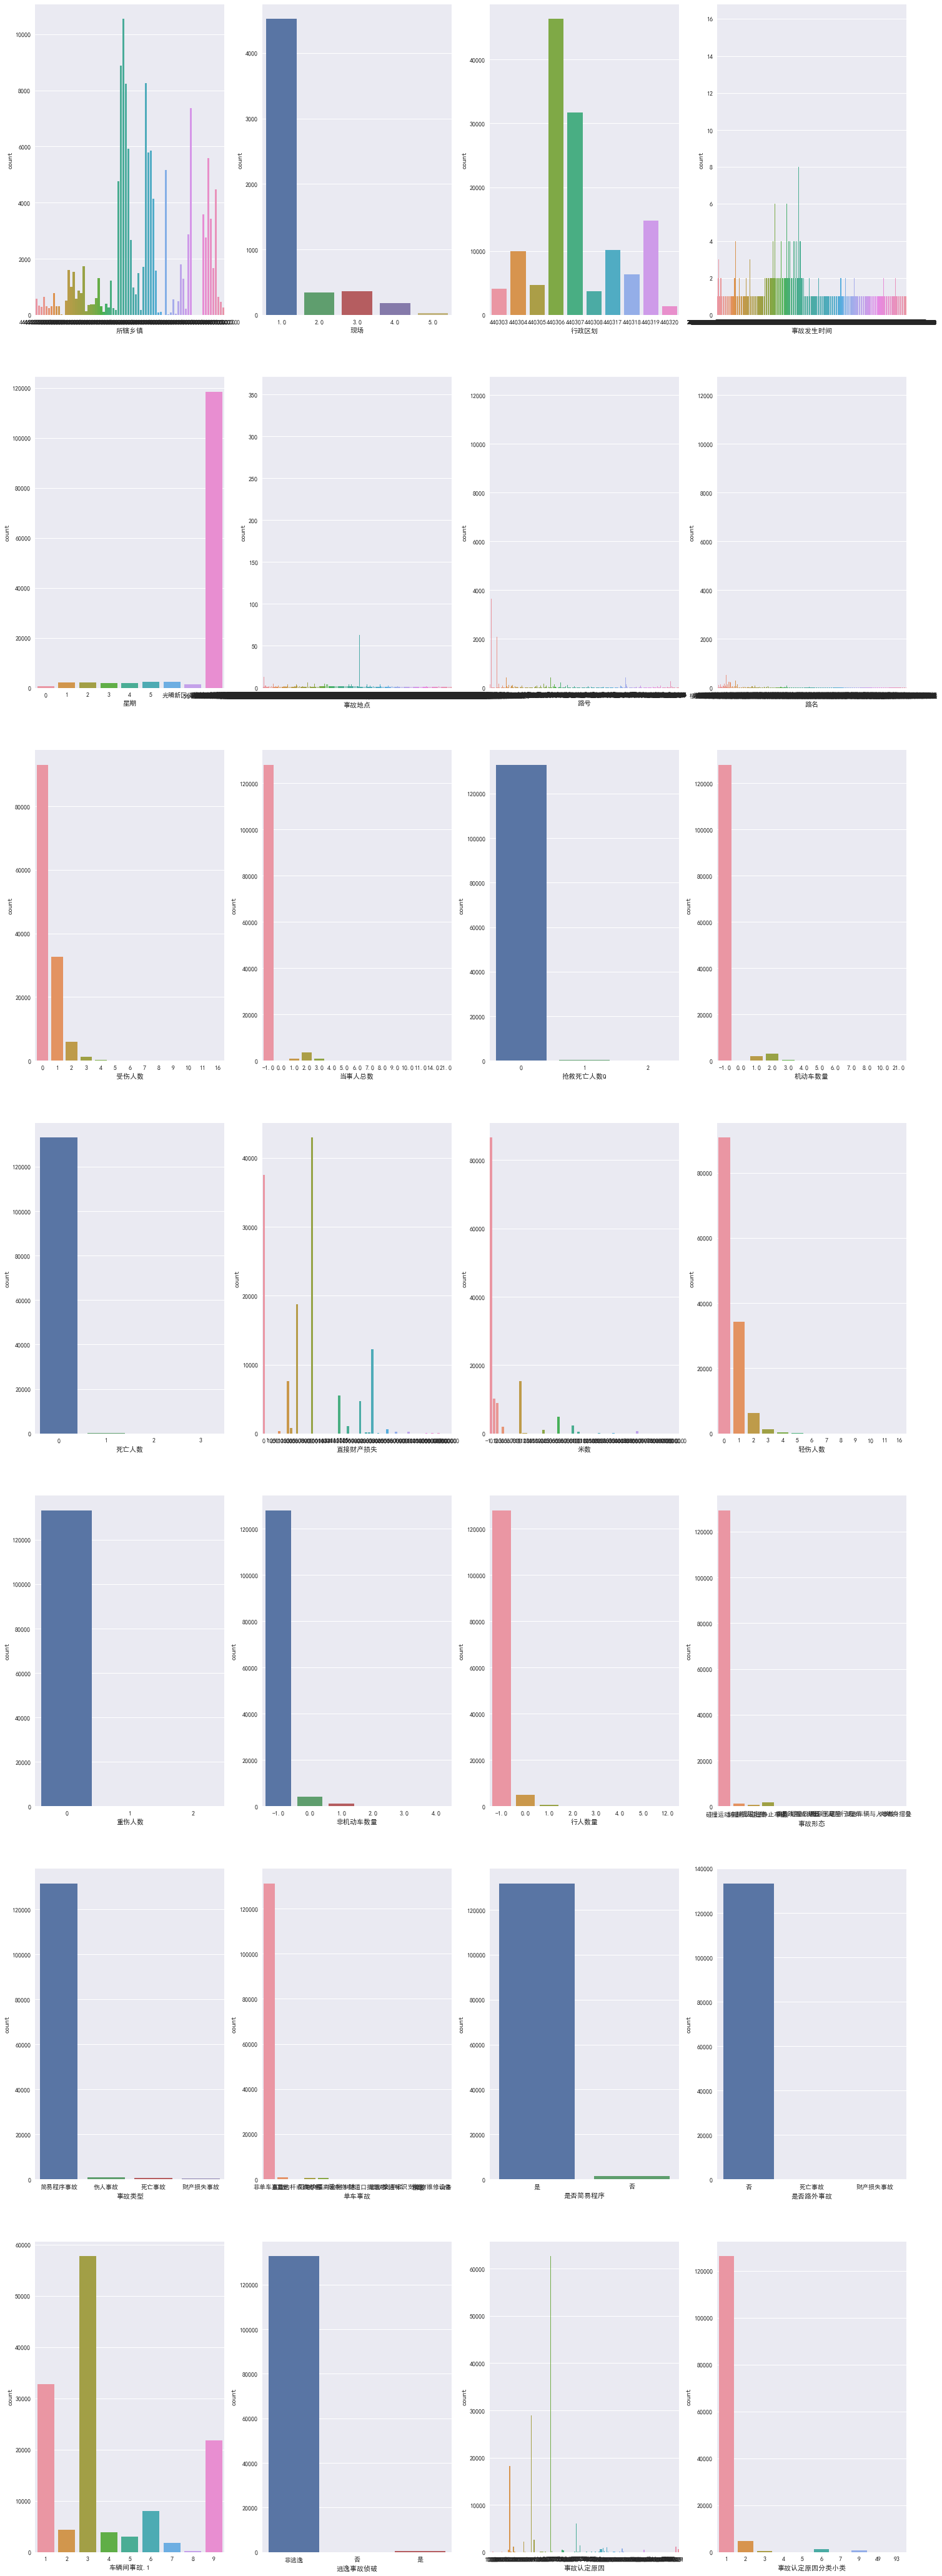

In [9]:
fig,axes = plt.subplots(7,4,figsize=[25,75])
x=0
y=0
for i in data_accident_withoutNo.columns:
    sns.countplot(data_a ccident_withoutNo[i],ax=axes[x,y])
    y += 1
    if y==4:
        y=0
        x+=1

In [11]:
data_scene = data_accident_withoutNo.dropna(subset=['现场'],how='any',axis=0)
del data_accident_withoutNo

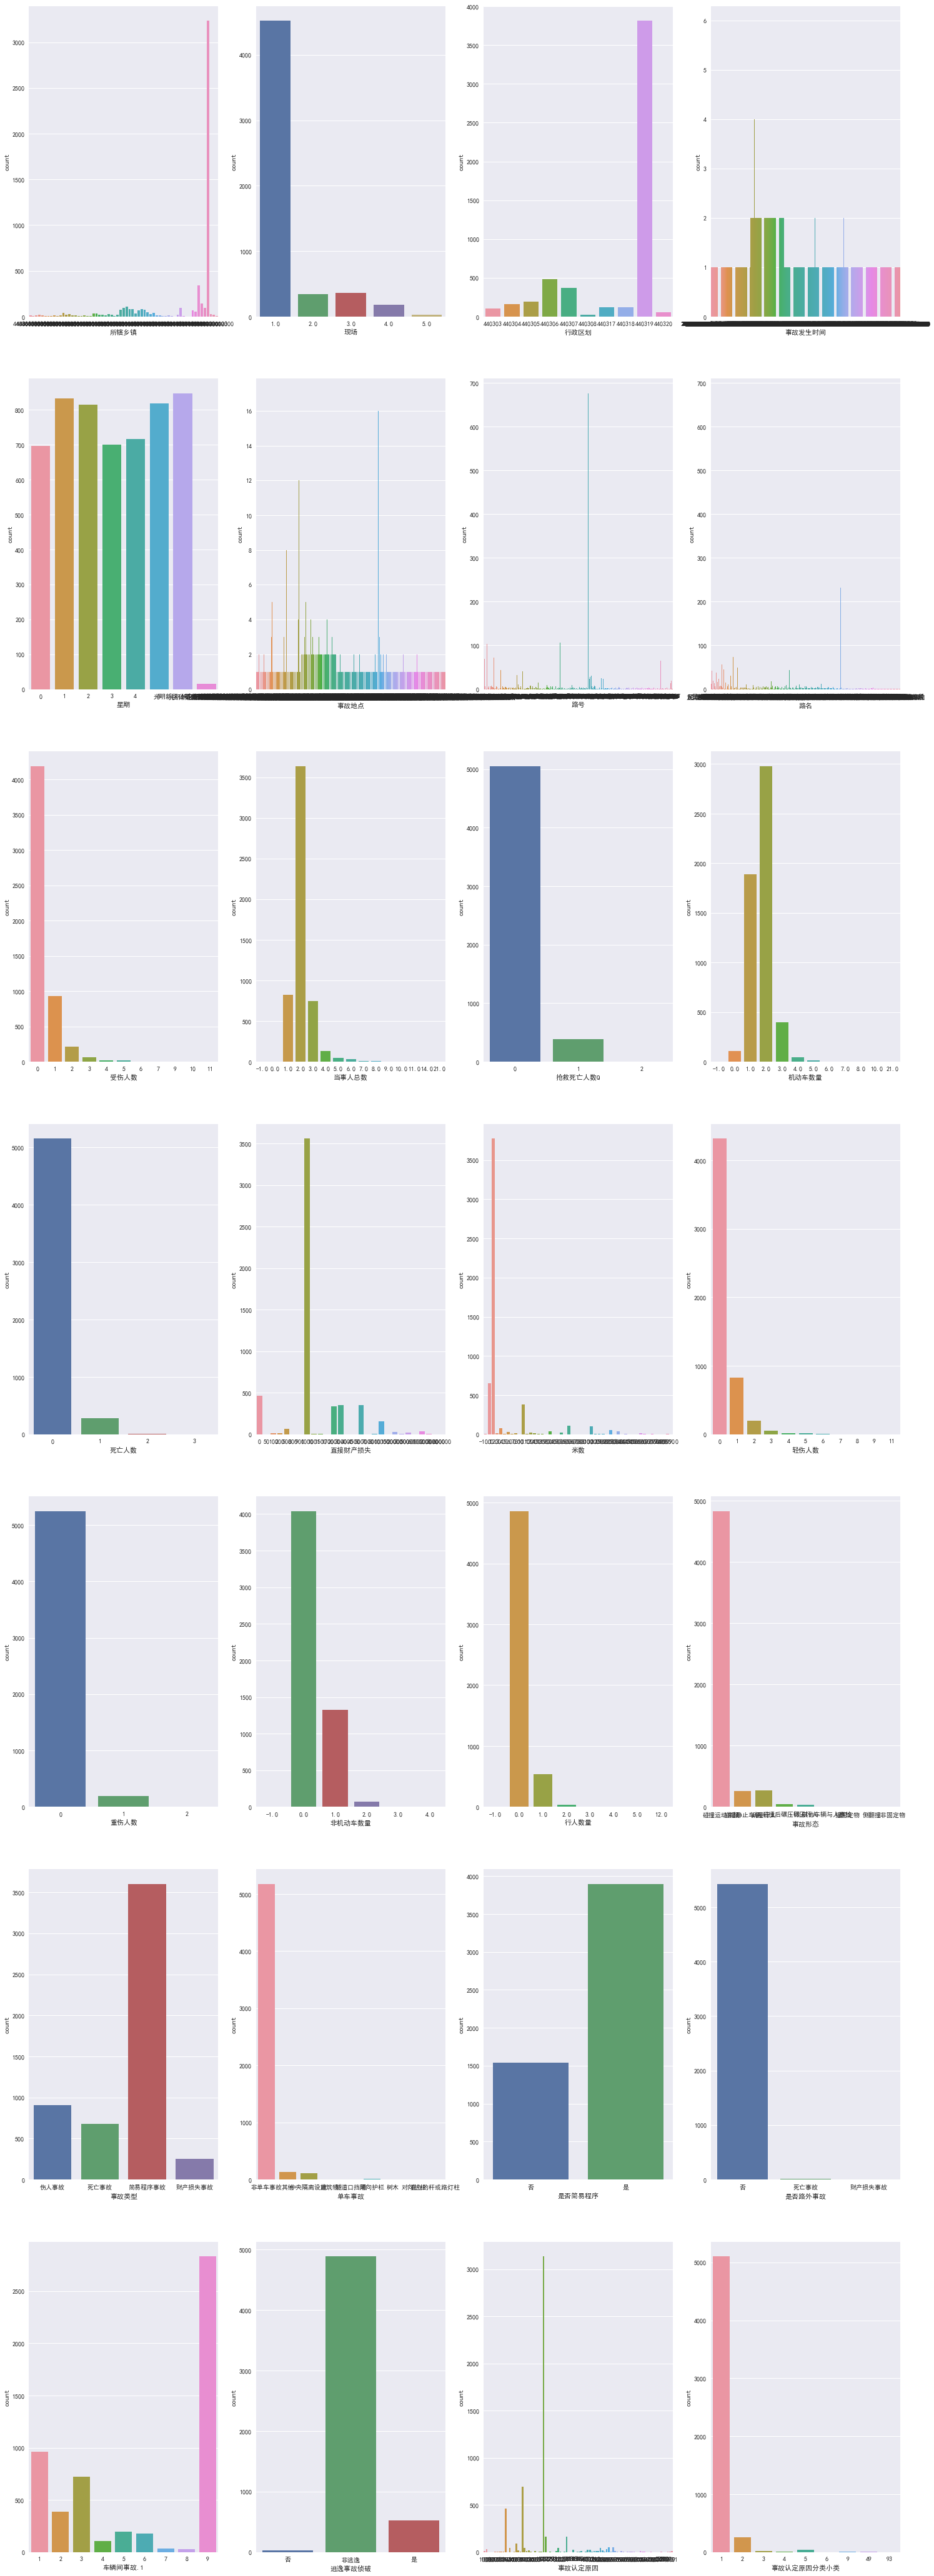

In [12]:
fig,axes = plt.subplots(7,4,figsize=[25,75])
x=0
y=0
for i in data_scene.columns:
    sns.countplot(data_scene[i],ax=axes[x,y])
    y += 1
    if y==4:
        y=0
        x+=1
del data_scene

#### 删除 现场 

In [14]:
data_accident_afterSerivity = pd.read_excel('data_accident_afterSerivity_17.10.17.xlsx')

In [15]:
print(len(data_accident_afterSerivity))
data_accident_afterSerivity.drop(['现场'],axis=1,inplace=True)

133361


In [16]:
for i in data_accident_afterSerivity.columns:
    print('%s:%s'%(i,sum(data_accident_afterSerivity[i].isnull())/len(data_accident_afterSerivity)))
print(len(data_accident_afterSerivity))

事故编号:0.0
所辖乡镇:3.74922203643e-05
行政区划:0.0
事故发生时间:0.0
星期:0.0
事故地点:0.0
路号:0.0
路名:8.24828848014e-05
受伤人数:0.0
当事人总数:0.0
抢救死亡人数Q:0.0
机动车数量:0.0
死亡人数:0.0
直接财产损失:0.0
米数:0.0
轻伤人数:0.0
重伤人数:0.0
非机动车数量:0.0
行人数量:0.0
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0
133361


### 2.5.2 路名，所辖乡镇 

In [17]:
data_accident_afterSerivity_noNan = data_accident_afterSerivity.dropna(subset=['路名','所辖乡镇'],axis=0,how='any')
print(len(data_accident_afterSerivity_noNan))

133345


In [18]:
for i in data_accident_afterSerivity_noNan.columns:
    print('%s:%s'%(i,sum(data_accident_afterSerivity_noNan[i].isnull())/len(data_accident_afterSerivity_noNan)))

事故编号:0.0
所辖乡镇:0.0
行政区划:0.0
事故发生时间:0.0
星期:0.0
事故地点:0.0
路号:0.0
路名:0.0
受伤人数:0.0
当事人总数:0.0
抢救死亡人数Q:0.0
机动车数量:0.0
死亡人数:0.0
直接财产损失:0.0
米数:0.0
轻伤人数:0.0
重伤人数:0.0
非机动车数量:0.0
行人数量:0.0
事故形态:0.0
事故类型:0.0
单车事故:0.0
是否简易程序:0.0
是否路外事故:0.0
车辆间事故.1:0.0
逃逸事故侦破:0.0
事故认定原因:0.0
事故认定原因分类小类:0.0


In [19]:
del data_accident_afterSerivity
pd.DataFrame.to_excel(data_accident_afterSerivity_noNan,'data_accident_final_17.10.17.xlsx')
del data_accident_afterSerivity_noNan

# 3 数据相关性分析

In [2]:
data_accident = pd.read_excel('data_accident_final_17.10.17.xlsx')

In [ ]:
print(len(data_accident.columns))
fig,axes = plt.subplots(7,4,figsize=[25,75])
x=0
y=0
for i in data_accident.columns:
    sns.countplot(data_accident[i],ax=axes[x,y])
    y += 1
    if y==4:
        y=0
        x+=1

28


In [ ]:
from sklearn import preprocessing

columnsToNum = list(data_accident.columns)
columnsToNum.remove('车辆间事故.1')


data_accident_toNum = pd.DataFrame()
for i in columnsToNum:
    data_accident_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_accident[i])
# 转换为list插入才会非空
data_accident_toNum.insert(value=list(data_accident['车辆间事故.1']),loc=24,\
                                                    column='车辆间事故.1')


In [ ]:
print(len(data_accident.columns))
fig,axes = plt.subplots(7,4,figsize=[25,75])
x=0
y=0
for i in data_accident_toNum.columns:
    sns.countplot(data_accident_toNum[i],ax=axes[x,y])
    y += 1
    if y==4:
        y=0
        x+=1